## Main Idea
* write your inference as python scripts so that each time it should clear the cache and reset the state
* submit sample submission to pass through initial commit
* run all inference codes for whole test set

In [1]:
! pip uninstall -y typing
! pip install ../input/pytorchtabnetpretraining/pytorch_tabnet-2.0.1-py3-none-any.whl
! pip install /kaggle/input/iterative-stratification/iterative-stratification-master/

Found existing installation: typing 3.7.4.3
Uninstalling typing-3.7.4.3:
  Successfully uninstalled typing-3.7.4.3
Processing /kaggle/input/pytorchtabnetpretraining/pytorch_tabnet-2.0.1-py3-none-any.whl
Processing /kaggle/input/iterative-stratification/iterative-stratification-master
  Created wheel for iterative-stratification: filename=iterative_stratification-0.1.6-py3-none-any.whl size=8401 sha256=c08416db137d2ad910fc16489558e4c9e1fa011e2790cc161c326c1fb8550610
  Stored in directory: /root/.cache/pip/wheels/b8/47/3f/eb4af42d124f37d23d6f13a4c8bbc32c1d70140e6e1cecb4aa
Successfully built iterative-stratification


In [2]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
import pickle
import seaborn as sns
sns.set()

from sklearn import preprocessing
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer
from sklearn.decomposition import PCA, TruncatedSVD, KernelPCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, KFold
from sklearn.cluster import KMeans

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from pytorch_tabnet.metrics import Metric
from pytorch_tabnet.tab_model import TabNetRegressor

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../input/iterative-stratification/iterative-stratification-master')
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

In [3]:
SEED = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
NFOLDS = 5

for seed in SEED:
    for fold in range(NFOLDS):
        !cp -r ../input/yuki-moa-tabnet1/TabNet_FOLD{str(fold+1)}_SEED{str(seed)}/* .
        !zip TabNet_FOLD{fold+1}_SEED{seed}.zip model_params.json network.pt

  adding: model_params.json (deflated 45%)
  adding: network.pt (deflated 8%)
  adding: model_params.json (deflated 45%)
  adding: network.pt (deflated 8%)
  adding: model_params.json (deflated 45%)
  adding: network.pt (deflated 8%)
  adding: model_params.json (deflated 45%)
  adding: network.pt (deflated 8%)
  adding: model_params.json (deflated 45%)
  adding: network.pt (deflated 8%)
  adding: model_params.json (deflated 45%)
  adding: network.pt (deflated 8%)
  adding: model_params.json (deflated 45%)
  adding: network.pt (deflated 8%)
  adding: model_params.json (deflated 45%)
  adding: network.pt (deflated 8%)
  adding: model_params.json (deflated 45%)
  adding: network.pt (deflated 8%)
  adding: model_params.json (deflated 45%)
  adding: network.pt (deflated 8%)
  adding: model_params.json (deflated 45%)
  adding: network.pt (deflated 8%)
  adding: model_params.json (deflated 45%)
  adding: network.pt (deflated 8%)
  adding: model_params.json (deflated 45%)
  adding: network.pt 

In [4]:
# test = pd.read_csv('../input/lish-moa/test_features.csv')
# if len(test) == 3982:
#     submission = pd.read_csv('../input/lish-moa/sample_submission.csv')
#     submission.to_csv('submission.csv', index=False)
# else:
# ! python ../input/baseline-inference/baseline_inference.py
# ! python ../input/baseline-inference/moa_v1_nn_inference.py
# ! python ../input/baseline-inference/moa_v2_nn_inference.py
# ! python ../input/baseline-inference/moa_v3_nn_inference.py
# ! python ../input/baseline-inference/moa_v4_nn_inference.py
# submission = pd.read_csv('../input/lish-moa/sample_submission.csv')
# submission.iloc[:, 1:] = 0
# for sub in glob.glob('./*.csv'):
#     submission.iloc[:, 1:] += pd.read_csv(sub).iloc[:, 1:] * (1/len(glob.glob('./*.csv')))
# submission.to_csv('submission.csv', index=False)

In [5]:
! python ../input/yuki-moa-inference2/yuki-moa-simple-inference2.py
! python ../input/yuki-moa-inference2/yuki-moa-resnet-inference2.py
! python ../input/yuki-moa-inference2/yuki-moa-simple-deep-inference2.py
! python ../input/yuki-moa-inference2/yuki-moa-tabnet-inference2.py

rank_gauss: done
train_features.shape (23814, 876)
test_features.shape (3982, 876)
get_stats: done
train_features.shape (23814, 888)
test_features.shape (3982, 888)
get_pca: done
train_features.shape (23814, 1538)
test_features.shape (3982, 1538)
var_thresh: done
train_features.shape (23814, 1044)
test_features.shape (3982, 1044)
train.shape: (21948, 1249)
folds.shape: (21948, 1250)
test.shape: (3624, 1043)
target.shape: (21948, 207)
sample_submission.shape: (3982, 207)
device used: cuda
 
SEED : 0

==========FOLD1==========
==========FOLD2==========
==========FOLD3==========
==========FOLD4==========
==========FOLD5==========
 
SEED : 1

==========FOLD1==========
==========FOLD2==========
==========FOLD3==========
==========FOLD4==========
==========FOLD5==========
 
SEED : 2

==========FOLD1==========
==========FOLD2==========
==========FOLD3==========
==========FOLD4==========
==========FOLD5==========
 
SEED : 3

==========FOLD1==========
==========FOLD2==========
==========FOLD3==

In [6]:
submission = pd.read_csv('../input/lish-moa/sample_submission.csv')
submission.iloc[:, 1:] = 0

# Weights = [0.29827331, 0.,         0.27804099, 0.4236857 ]

submission_Simple1 = pd.read_csv('./submission_Simple.csv').iloc[:, 1:]
submission_ResNet1 = pd.read_csv('./submission_ResNet.csv').iloc[:, 1:]
submission_Simple_Deep1 = pd.read_csv('./submission_Simple_Deep.csv').iloc[:, 1:]
submission_TabNet1 = pd.read_csv('./submission_TabNet.csv').iloc[:, 1:]

# submission.iloc[:, 1:] = submission_Simple + submission_ResNet + submission_Simple_Deep + submission_TabNet

# submission.to_csv('submission.csv', index=False)

In [7]:
train_features = pd.read_csv('../input/lish-moa/train_features.csv')
train_targets_scored = pd.read_csv('../input/lish-moa/train_targets_scored.csv')
train_targets_nonscored = pd.read_csv('../input/lish-moa/train_targets_nonscored.csv')

test_features = pd.read_csv('../input/lish-moa/test_features.csv')
sample_submission = pd.read_csv('../input/lish-moa/sample_submission.csv')

In [8]:
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASSED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True
    
seed_everything(seed=42)

## preprocess data

In [9]:
def rank_gauss(train_features, test_features):
    
    train_features_ = train_features.copy()
    test_features_ = test_features.copy()
    
    data = pd.concat([train_features_, test_features])
    
    GENES = [col for col in train_features_.columns if col.startswith('g-')]
    CELLS = [col for col in train_features_.columns if col.startswith('c-')]
    
    for col in (GENES + CELLS):

        transformer = QuantileTransformer(n_quantiles=100,random_state=0, output_distribution="normal")
        vec_len = len(data[col].values)
#         vec_len_test = len(test_features_[col].values)
        raw_vec = data[col].values.reshape(vec_len, 1)
        raw_vec = transformer.fit_transform(raw_vec)

        train_features_[col] = raw_vec[:len(train_features)]
        test_features_[col] = raw_vec[len(train_features):]
        
    return train_features_, test_features_

# train_features1, test_features1 = rank_gauss2(train_features, test_features)
# train_features1

In [10]:
def get_stats(train_features, test_features):
    
    GENES = [col for col in train_features.columns if col.startswith('g-')]
    CELLS = [col for col in train_features.columns if col.startswith('c-')]
    
    for df in [train_features, test_features]:
#         df['g_sum'] = df[GENES].sum(axis = 1)
        df['g_mean'] = df[GENES].mean(axis = 1)
        df['g_std'] = df[GENES].std(axis = 1)
        df['g_kurt'] = df[GENES].kurtosis(axis = 1)
        df['g_skew'] = df[GENES].skew(axis = 1)
#         df['g_max'] = df[GENES].max(axis=1)
#         df['g_min'] = df[GENES].max(axis=1)
#         df['c_sum'] = df[CELLS].sum(axis=1)
        df['c_mean'] = df[CELLS].mean(axis = 1)
        df['c_std'] = df[CELLS].std(axis = 1)
        df['c_kurt'] = df[CELLS].kurtosis(axis = 1)
        df['c_skew'] = df[CELLS].skew(axis = 1)
#         df['c_max'] = df[CELLS].max(axis=1)
#         df['c_min'] = df[CELLS].min(axis=1)
#         df['gc_sum'] = df[GENES + CELLS].sum(axis = 1)
        df['gc_mean'] = df[GENES + CELLS].mean(axis = 1)
        df['gc_std'] = df[GENES + CELLS].std(axis = 1)
        df['gc_kurt'] = df[GENES + CELLS].kurtosis(axis = 1)
        df['gc_skew'] = df[GENES + CELLS].skew(axis = 1)
        
    return train_features, test_features

In [11]:
def get_pca(train_features, test_features, n_gs, n_cs):
    
    GENES = [col for col in train_features.columns if col.startswith('g-')]
    CELLS = [col for col in train_features.columns if col.startswith('c-')]
    
    pca_gs = PCA(n_components = n_gs)
    pca_cs = PCA(n_components = n_cs)
    
    data = pd.concat([train_features, test_features])
    
    data_pca_gs = pca_gs.fit_transform(data[GENES])
    data_pca_cs = pca_cs.fit_transform(data[CELLS])
    
    train_pca_gs = data_pca_gs[:len(train_features), :]
    train_pca_cs = data_pca_cs[:len(train_features), :]
    test_pca_gs = data_pca_gs[len(train_features):, :]
    test_pca_cs = data_pca_cs[len(train_features):, :]
    
    train_pca_gs = pd.DataFrame(train_pca_gs, columns=[f'pca_G-{i}' for i in range(n_gs)])
    train_pca_cs = pd.DataFrame(train_pca_cs, columns=[f'pca_C-{i}' for i in range(n_cs)])
    test_pca_gs = pd.DataFrame(test_pca_gs, columns=[f'pca_G-{i}' for i in range(n_gs)])
    test_pca_cs = pd.DataFrame(test_pca_cs, columns=[f'pca_C-{i}' for i in range(n_cs)])
    
    train_features = pd.concat([train_features, train_pca_gs, train_pca_cs], axis=1)
    test_features = pd.concat([test_features, test_pca_gs, test_pca_cs], axis=1)
    
    return train_features, test_features

# train_features2, test_features2 = get_pca2(train_features, test_features, n_gs=50, n_cs=15)
# test_features2

In [12]:
def var_thresh(threshold, train_features, test_features):

    cols_numeric = [f for f in train_features.columns if f not in ['sig_id', 'cp_type', 'cp_time', 'cp_dose']]
    mask = (train_features[cols_numeric].var() >= 0.8).values
    train_features_ = train_features[cols_numeric].loc[:, mask]
    test_features_ = test_features[cols_numeric].loc[:, mask]
    train_features = pd.concat([train_features[['sig_id', 'cp_type', 'cp_time', 'cp_dose']], train_features_], axis=1).reset_index(drop=True)
    test_features = pd.concat([test_features[['sig_id', 'cp_type', 'cp_time', 'cp_dose']], test_features_], axis=1).reset_index(drop=True)

    return train_features, test_features

In [13]:
def make_folds(train, num_starts, num_splits):
    
    train_ = train.copy()
    folds = []

    # LOAD FILES
    train_feats = pd.read_csv('../input/lish-moa/train_features.csv')
    scored = pd.read_csv('/kaggle/input/lish-moa/train_targets_scored.csv')
    drug = pd.read_csv('/kaggle/input/lish-moa/train_drug.csv')
    scored = scored.loc[train_feats['cp_type'] == 'trt_cp', :]
    drug = drug.loc[train_feats['cp_type'] == 'trt_cp', :]
    targets = scored.columns[1:]
    scored = scored.merge(drug, on='sig_id', how='left') 

    # LOCATE DRUGS
    vc = scored.drug_id.value_counts()
    vc1 = vc.loc[(vc <= 6) | (vc == 12) | (vc == 18)].index.sort_values()
    vc2 = vc.loc[(vc > 6) & (vc != 12) & (vc != 18)].index.sort_values()

    for seed in range(num_starts):

        # STRATIFY DRUGS 18X OR LESS
        dct1 = {}; dct2 = {}
        skf = MultilabelStratifiedKFold(n_splits = num_splits, shuffle = True, random_state = seed)
        tmp = scored.groupby('drug_id')[targets].mean().loc[vc1]
        for fold,(idxT,idxV) in enumerate(skf.split(tmp,tmp[targets])):
            dd = {k:fold for k in tmp.index[idxV].values}
            dct1.update(dd)

        # STRATIFY DRUGS MORE THAN 18X
        skf = MultilabelStratifiedKFold(n_splits = num_splits, shuffle = True, random_state = seed)
        tmp = scored.loc[scored.drug_id.isin(vc2)].reset_index(drop = True)
        for fold,(idxT,idxV) in enumerate(skf.split(tmp,tmp[targets])):
            dd = {k:fold for k in tmp.sig_id[idxV].values}
            dct2.update(dd)

        # ASSIGN FOLDS
        scored['fold'] = scored.drug_id.map(dct1)
        scored.loc[scored.fold.isna(),'fold'] =\
            scored.loc[scored.fold.isna(),'sig_id'].map(dct2)
        scored.fold = scored.fold.astype('int8')
        folds.append(scored.fold.values)

        del scored['fold']
        
        for i in range(len(folds)):
            train_[f'seed{i}'] = folds[i]

    return train_

In [14]:
def make_folds_old(train, n_splits):
    
    folds = train.copy()

    mskf = MultilabelStratifiedKFold(n_splits)

    for f, (t_idx, v_idx) in enumerate(mskf.split(X=train, y=target)):
        folds.loc[v_idx, 'kfold'] = int(f)

    folds['kfold'] = folds['kfold'].astype(int)
    
    return folds

In [15]:
def preprocessor(train_features, test_features, train_targets_scored, train_targets_nonscored):
    
#     # drop_ctl_vehicle
#     train_features, test_features, target = drop_ctl_vehicle(train_features, test_features)
#     print('drop_ctl_vehicle: done')
    
    # rank_gauss
    train_features, test_features = rank_gauss(train_features, test_features)
    print('rank_gauss: done')
    print('train_features.shape', train_features.shape)
    print('test_features.shape', test_features.shape)
    
    # stats
    train_features, test_features = get_stats(train_features, test_features)
    print('get_stats: done')
    print('train_features.shape', train_features.shape)
    print('test_features.shape', test_features.shape)
    
    # pca
    train_features, test_features = get_pca(train_features, test_features, n_gs=600, n_cs=50) 
    print('get_pca: done')
    print('train_features.shape', train_features.shape)
    print('test_features.shape', test_features.shape)
    
    # var_thresh
    train_features, test_features = var_thresh(threshold=0.8, train_features=train_features, test_features=test_features)
    print('var_thresh: done')
    print('train_features.shape', train_features.shape)
    print('test_features.shape', test_features.shape)
    
#     # clustering
#     train_features, test_features = get_cluster(train_features, test_features, n_clusters_g=35, n_clusters_c=5, SEED=0)
#     print('get_clustering: done')
#     print('train_features.shape', train_features.shape)
#     print('test_features.shape', test_features.shape)
    
#     # Scaling
#     train_features, test_features = scaling(train_features, test_features)
#     print('scaling: done')  # ない方がいいかも。
    
    # data merge
    nonscored_cols = train_targets_nonscored.iloc[:, 1:].sum(axis=0).sort_values(ascending=False).index.tolist() # Moaが多い順にカラムを取得
    nonscored_cols = ['sig_id'] + nonscored_cols[:train_targets_scored.shape[1]-1]
    train_targets_nonscored = train_targets_nonscored[nonscored_cols] # MoAが多い順にnonscoredからscoredと同じ分だけ抜き取る
    
    train = train_features.merge(train_targets_scored, on='sig_id').merge(train_targets_nonscored, on='sig_id')
    train = train[train['cp_type'] != 'ctl_vehicle'].reset_index(drop=True)
    test = test_features[test_features['cp_type'] != 'ctl_vehicle'].reset_index(drop=True)

    target = train[train_targets_scored.columns]
    target_nonscored = train[train_targets_nonscored.columns]
    target_nonscored = target_nonscored.iloc[:, :target.shape[1]]
    
    train = train.drop('cp_type', axis=1)
    test = test.drop('cp_type', axis=1)
    
    return train, target, test, target_nonscored

train, target, test, target_nonscored = preprocessor(train_features, test_features, train_targets_scored, train_targets_nonscored)

rank_gauss: done
train_features.shape (23814, 876)
test_features.shape (3982, 876)
get_stats: done
train_features.shape (23814, 888)
test_features.shape (3982, 888)
get_pca: done
train_features.shape (23814, 1538)
test_features.shape (3982, 1538)
var_thresh: done
train_features.shape (23814, 1043)
test_features.shape (3982, 1043)


In [16]:
folds = make_folds_old(train, n_splits=5)

In [17]:
GENES = [col for col in train_features.columns if col.startswith('g-')]
CELLS = [col for col in train_features.columns if col.startswith('c-')]
predictors = GENES+CELLS

target_cols = target.drop('sig_id', axis=1).columns.values.tolist()
target_nonscored_cols = target_nonscored.drop('sig_id', axis=1).columns.values.tolist()
feature_cols = [c for c in pd.get_dummies(train, columns=['cp_time', 'cp_dose']).columns if (c not in target_cols) & (c not in target_nonscored_cols)]
feature_cols = [c for c in feature_cols if c not in ['kfold', 'sig_id']]
len(feature_cols)

1044

### shape check

In [18]:
print(f'train.shape: {train.shape}')
print(f'folds.shape: {folds.shape}')
print(f'test.shape: {test.shape}')
print(f'target.shape: {target.shape}')
print(f'target_nonscored.shape: {target_nonscored.shape}')
print(f'sample_submission.shape: {sample_submission.shape}')

train.shape: (21948, 1454)
folds.shape: (21948, 1455)
test.shape: (3624, 1042)
target.shape: (21948, 207)
target_nonscored.shape: (21948, 207)
sample_submission.shape: (3982, 207)


## Dataset Classes

In [19]:
class MoADataset:
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets
        
    def __len__(self):
        return (self.features.shape[0])
    
    def __getitem__(self, idx):
        dct = {
            'x' : torch.tensor(self.features[idx, :], dtype=torch.float), 
            'y' : torch.tensor(self.targets[idx, :], dtype=torch.float)
        }
        return dct
    
class TestDataset:
    def __init__(self, features):
        self.features = features
        
    def __len__(self):
        return (self.features.shape[0])
    
    def __getitem__(self, idx):
        dct = {
            'x' : torch.tensor(self.features[idx, :], dtype=torch.float)
        }
        return dct

### training function

In [20]:
def train_fn(model, optimizer, scheduler, loss_tr, loss_fn, dataloader, device):
    rejected = 0
    model.train()
    final_loss = 0
    final_metric = 0
    
    for data in dataloader:
        optimizer.zero_grad()
        inputs, targets = data['x'].to(device), data['y'].to(device)
        if len(inputs) > 1:
            outputs = model(inputs)
            loss = loss_tr(outputs, targets)
            metric = loss_fn(outputs, targets)
            loss.backward()
            optimizer.step()
            scheduler.step()

            final_loss += loss.item()
            final_metric += metric.item()
        
        else:
            rejected += len(inputs)
            
        
    final_loss /= (len(dataloader) - rejected)
    final_metric /= (len(dataloader) - rejected)
    
    return final_loss, final_metric

In [21]:
def valid_fn(model, loss_tr, loss_fn, dataloader, device):
    model.eval()
    final_loss = 0
    final_metric = 0
    valid_preds = []
    
    for data in dataloader:
        
        inputs, targets = data['x'].to(device), data['y'].to(device)
        outputs = model(inputs)
        loss = loss_tr(outputs, targets)
        metric = loss_fn(outputs, targets)
        final_loss += loss.item()
        final_metric += metric.item()
        outputs = torch.clamp(torch.sigmoid(outputs).detach().cpu(), p_min, p_max)
        valid_preds.append(outputs.numpy())
        
    final_loss /= len(dataloader)
    final_metric /= len(dataloader)
    valid_preds = np.concatenate(valid_preds)
        
    return final_loss, final_metric, valid_preds

In [22]:
def inference_fn(model, dataloader, device):
    model.eval()
    preds = []
    
    for data in dataloader:
        inputs = data['x'].to(device)
        
        with torch.no_grad():
            outputs = model(inputs)
            
        outputs = torch.clamp(torch.sigmoid(outputs).detach().cpu(), p_min, p_max)    
        preds.append(outputs.numpy())
        
    preds = np.concatenate(preds)
        
    return preds

### loss_function

In [23]:
class LogitsLogLoss(Metric):
    """
    LogLoss with sigmoid applied
    """

    def __init__(self):
        self._name = "logits_ll"
        self._maximize = False

    def __call__(self, y_true, y_pred):
        """
        Compute LogLoss of predictions.

        Parameters
        ----------
        y_true: np.ndarray
            Target matrix or vector
        y_score: np.ndarray
            Score matrix or vector

        Returns
        -------
            float
            LogLoss of predictions vs targets.
        """
        
        logits = 1 / (1 + np.exp(-y_pred))
#         logits = np.clip(logits, p_min, p_max)
        aux = (1 - y_true) * np.log(1 - logits + 1e-15) + y_true * np.log(logits + 1e-15)
        return np.mean(-aux)

In [24]:
import torch
from torch.nn.modules.loss import _WeightedLoss
import torch.nn.functional as F

class SmoothBCEwLogits(_WeightedLoss):
    def __init__(self, weight=None, reduction='mean', smoothing=0.0):
        super().__init__(weight=weight, reduction=reduction)
        self.smoothing = smoothing
        self.weight = weight
        self.reduction = reduction

    @staticmethod
    def _smooth(targets:torch.Tensor, n_labels:int, smoothing=0.0):
        assert 0 <= smoothing < 1

        with torch.no_grad():
            targets = targets * (1.0 - smoothing) + 0.5 * smoothing
            
        return targets
    
    def forward(self, inputs, targets):
        targets = SmoothBCEwLogits._smooth(targets, inputs.size(-1),
            self.smoothing)
        loss = F.binary_cross_entropy_with_logits(inputs, targets,self.weight)

        if  self.reduction == 'sum':
            loss = loss.sum()
        elif  self.reduction == 'mean':
            loss = loss.mean()

        return loss

In [25]:
class Model_Simple(nn.Module):
    def __init__(self, num_features, num_targets, hidden_size_1, hidden_size_2):
        super(Model_Simple, self).__init__()
        
        self.batch_norm1 = nn.BatchNorm1d(num_features=num_features)
        self.dropout1 = nn.Dropout(0.1)
        self.Linear1 = nn.utils.weight_norm(nn.Linear(num_features, hidden_size_1))
        self.leaky_relu1 = nn.LeakyReLU()
        
        self.batch_norm2 = nn.BatchNorm1d(hidden_size_1)
        self.dropout2 = nn.Dropout(0.4)
        self.Linear2 = nn.utils.weight_norm(nn.Linear(hidden_size_1, hidden_size_2))
        self.leaky_relu2 = nn.LeakyReLU()
        
        
        self.batch_norm3 = nn.BatchNorm1d(hidden_size_2)
        self.dropout3 = nn.Dropout(0.4)
        self.Linear3 = nn.utils.weight_norm(nn.Linear(hidden_size_2, num_targets))
        
    def recalibrate_layer(self, layer):

        if(torch.isnan(layer.weight_v).sum() > 0):
            print ('recalibrate layer.weight_v')
            layer.weight_v = torch.nn.Parameter(torch.where(torch.isnan(layer.weight_v), torch.zeros_like(layer.weight_v), layer.weight_v))
            layer.weight_v = torch.nn.Parameter(layer.weight_v + 1e-7)

        if(torch.isnan(layer.weight).sum() > 0):
            print ('recalibrate layer.weight')
            layer.weight = torch.where(torch.isnan(layer.weight), torch.zeros_like(layer.weight), layer.weight)
            layer.weight += 1e-7
        
        
    def forward(self, x):
        x = self.batch_norm1(x)
        x = self.dropout1(x)
        self.recalibrate_layer(self.Linear1)
        x = self.Linear1(x)
        x = self.leaky_relu1(x)
        
        x = self.batch_norm2(x)
        x = self.dropout2(x)
        self.recalibrate_layer(layer=self.Linear2)
        x = self.Linear2(x)
        x = self.leaky_relu2(x)
        
        x = self.batch_norm3(x)
        x = self.dropout3(x)
        self.recalibrate_layer(layer=self.Linear3)
        x = self.Linear3(x)
        
        return x

In [26]:
class Model_ResNet(nn.Module):
    def __init__(self, num_features_1, num_features_2, num_targets, hidden_1, hidden_2):
        super(Model_ResNet, self).__init__()
        
        self.batchnorm1_1 = nn.BatchNorm1d(num_features_1)
        self.dropout1_1 = nn.Dropout(0.3)
        self.Linear1_1 = nn.Linear(num_features_1, hidden_1)
        self.relu1_1 = nn.ReLU()
        self.batchnorm1_2 = nn.BatchNorm1d(hidden_1)
        self.Linear1_2 = nn.Linear(hidden_1, hidden_2)
        self.relu1_2 = nn.ReLU()
        
        self.batchnorm2_1 = nn.BatchNorm1d(num_features_2+hidden_2)
        self.dropout2_1 = nn.Dropout(0.3)
        self.Linear2_1 = nn.Linear(num_features_2+hidden_2, hidden_1)
        self.relu2_1 = nn.ReLU()
        self.batchnorm2_2 = nn.BatchNorm1d(hidden_1)
        self.Linear2_2 = nn.Linear(hidden_1, hidden_1)
        self.relu2_2 = nn.ReLU()
        self.batchnorm2_3 = nn.BatchNorm1d(hidden_1)
        self.Linear2_3 = nn.Linear(hidden_1, hidden_2)
        self.relu2_3 = nn.ReLU()
        
        self.batchnorm3_1 = nn.BatchNorm1d(hidden_2)
        self.Linear3_1 = nn.Linear(hidden_2, hidden_2)
        self.relu3_1 = nn.ReLU()
        self.batchnorm3_2 = nn.BatchNorm1d(hidden_2) 
        self.Linear3_2 = nn.Linear(hidden_2, num_targets)
        
        
        
    def recalibrate_layer(self, layer):

        if(torch.isnan(layer.weight_v).sum() > 0):
            print ('recalibrate layer.weight_v')
            layer.weight_v = torch.nn.Parameter(torch.where(torch.isnan(layer.weight_v), torch.zeros_like(layer.weight_v), layer.weight_v))
            layer.weight_v = torch.nn.Parameter(layer.weight_v + 1e-7)

        if(torch.isnan(layer.weight).sum() > 0):
            print ('recalibrate layer.weight')
            layer.weight = torch.where(torch.isnan(layer.weight), torch.zeros_like(layer.weight), layer.weight)
            layer.weight += 1e-7
            
    def forward(self, x_1, x_2):
        
        input_1 = x_1
        input_2 = x_2
        
        input_3 = self.batchnorm1_1(input_1)
        input_3 = self.dropout1_1(input_3)
        input_3 = self.Linear1_1(input_3)
        input_3 = self.relu1_1(input_3)
        input_3 = self.batchnorm1_2(input_3)
        input_3 = self.Linear1_2(input_3)
        input_3 = self.relu1_2(input_3)
        
        input_3_concat = torch.cat([input_2, input_3], axis=1)
        
        input_4 = self.batchnorm2_1(input_3_concat)
        input_4 = self.dropout2_1(input_4)
        input_4 = self.Linear2_1(input_4)
        input_4 = self.relu2_1(input_4)
        input_4 = self.batchnorm2_2(input_4)
        input_4 = self.Linear2_2(input_4)
        input_4 = self.relu2_2(input_4)
        input_4 = self.batchnorm2_3(input_4)
        input_4 = self.Linear2_3(input_4)
        input_4 = self.relu2_3(input_4)
        
        input_4_avg = (input_3 + input_4) * 0.5
        
        output = self.batchnorm3_1(input_4_avg)
        output = self.Linear3_1(output)
        output = self.relu3_1(output)
        output = self.batchnorm3_2(output)
        output = self.Linear3_2(output)
        
        return output

In [27]:
class Model_Simple_Deep(nn.Module):
    
    def __init__(self, num_features, num_targets):
        
        super(Model_Simple_Deep, self).__init__()
        self.hidden_size = [1500, 1250, 1000, 750]
        self.dropout_value = [0.5, 0.35, 0.3, 0.25]

        self.batch_norm1 = nn.BatchNorm1d(num_features)
        self.dense1 = nn.Linear(num_features, self.hidden_size[0])
        
        self.batch_norm2 = nn.BatchNorm1d(self.hidden_size[0])
        self.dropout2 = nn.Dropout(self.dropout_value[0])
        self.dense2 = nn.Linear(self.hidden_size[0], self.hidden_size[1])

        self.batch_norm3 = nn.BatchNorm1d(self.hidden_size[1])
        self.dropout3 = nn.Dropout(self.dropout_value[1])
        self.dense3 = nn.Linear(self.hidden_size[1], self.hidden_size[2])

        self.batch_norm4 = nn.BatchNorm1d(self.hidden_size[2])
        self.dropout4 = nn.Dropout(self.dropout_value[2])
        self.dense4 = nn.Linear(self.hidden_size[2], self.hidden_size[3])

        self.batch_norm5 = nn.BatchNorm1d(self.hidden_size[3])
        self.dropout5 = nn.Dropout(self.dropout_value[3])
        self.dense5 = nn.utils.weight_norm(nn.Linear(self.hidden_size[3], num_targets))
    
    def forward(self, x):
        
        x = self.batch_norm1(x)
        x = F.leaky_relu(self.dense1(x))
        
        x = self.batch_norm2(x)
        x = self.dropout2(x)
        x = F.leaky_relu(self.dense2(x))

        x = self.batch_norm3(x)
        x = self.dropout3(x)
        x = F.leaky_relu(self.dense3(x))

        x = self.batch_norm4(x)
        x = self.dropout4(x)
        x = F.leaky_relu(self.dense4(x))

        x = self.batch_norm5(x)
        x = self.dropout5(x)
        x = self.dense5(x)
        return x
    
class LabelSmoothingLoss(nn.Module):
    
    def __init__(self, classes, smoothing=0.0, dim=-1):
        super(LabelSmoothingLoss, self).__init__()
        self.confidence = 1.0 - smoothing
        self.smoothing = smoothing
        self.cls = classes
        self.dim = dim

    def forward(self, pred, target):
        pred = pred.log_softmax(dim=self.dim)

        with torch.no_grad():
            true_dist = torch.zeros_like(pred)
            true_dist.fill_(self.smoothing / (self.cls - 1))
            true_dist.scatter_(1, target.data.unsqueeze(1), self.confidence)
            
        return torch.mean(torch.sum(-true_dist * pred, dim=self.dim))    

In [28]:
class FineTuneScheduler:
    def __init__(self, epochs):
        self.epochs = epochs
        self.epochs_per_step = 0
        self.frozen_layers = []
        
    def copy_without_top(self, model, num_features, num_targets, num_targets_new):
        self.frozen_layers = []
        
        model_new = Model_Simple_Deep(num_features, num_targets)
        model_new.load_state_dict(model.state_dict())
        
        # Freeze all weights
        for name, param in model_new.named_parameters():
            layer_index = name.split('.')[0][-1]
            
            if layer_index == 5:
                continue
                
            param.requires_grad = False
            
            # Save frozen layer names
            if layer_index not in self.frozen_layers:
                self.frozen_layers.append(layer_index)
                
        self.epochs_per_step = self.epochs // len(self.frozen_layers)
        
        # Replace the top layers with another ones
        model_new.batch_norm5 = nn.BatchNorm1d(model_new.hidden_size[3])
        model_new.dropout5 = nn.Dropout(model_new.dropout_value[3])
        model_new.dense5 = nn.utils.weight_norm(nn.Linear(model_new.hidden_size[-1], num_targets_new))
        model_new.to(DEVICE)
        return model_new
    
    def step(self, epoch, model):
        if len(self.frozen_layers) == 0:
            return 
        
        if epoch % self.epochs_per_step == 0:
            last_frozen_index = self.frozen_layers[-1]
            
            # Unfreeze parameters of the last frozen layer
            for name, param in model.named_parameters():
                layer_index = name.split('.')[0][-1]
                
                if layer_index == last_frozen_index:
                    param.requires_grad = True
                    
            del self.frozen_layers[-1]  # Remove the last layer as unfrozen

## Model Simple

In [29]:
DEVICE = ('cuda' if torch.cuda.is_available() else 'cpu')
EPOCHS = 35
BATCH_SIZE = 64
LEARNING_RATE = 1e-3
WEIGHT_DECAY = 5e-6
NFOLDS = 5
EARLY_STOPPING_STEPS = 10
EARLY_STOP = False
smoothing = 0.001
p_min = smoothing
p_max = 1 - smoothing

num_features = len(feature_cols)
num_targets = len(target_cols)
hidden_size_1 = 1024
hidden_size_2 = 1024

In [30]:
def run_training(fold, seed, EPOCHS, LEARNING_RATE):
    
    print(f'==========FOLD{fold+1}==========')
    
    
    seed_everything(seed)
    
    train_losses = list()
    valid_losses = list()
    CV = list()
    
    train = pd.get_dummies(folds, columns=['cp_time', 'cp_dose'])
    test_ = pd.get_dummies(test, columns=['cp_time', 'cp_dose'])
    
    trn_idx = train[train['kfold'] != fold].index
    val_idx = train[train['kfold'] == fold].index
    
    train_df = train[train['kfold'] != fold].reset_index()
    valid_df = train[train['kfold'] == fold].reset_index()
    
    x_train, y_train = train_df[feature_cols].values, train_df[target_cols].values
    x_valid, y_valid = valid_df[feature_cols].values, valid_df[target_cols].values
    
    train_dataset = MoADataset(x_train, y_train)
    valid_dataset = MoADataset(x_valid, y_valid)
    
    trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    validloader = torch.utils.data.DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)
    
    model = Model_Simple(num_features=num_features,
                      num_targets=num_targets, 
                      hidden_size_1=hidden_size_1, 
                      hidden_size_2=hidden_size_2)
    

    model.to(DEVICE)
    
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
    scheduler = optim.lr_scheduler.OneCycleLR(optimizer=optimizer, pct_start=0.3, div_factor=1e3, 
                                              max_lr=1e-2, epochs=EPOCHS, steps_per_epoch=len(trainloader)) 
    
    loss_fn = nn.BCEWithLogitsLoss()
    loss_tr = SmoothBCEwLogits(smoothing=smoothing)
    
    early_stoppping_steps = EARLY_STOPPING_STEPS
    early_step = 0
    
    oof = np.zeros((len(train), target.iloc[:, 1:].shape[1]))
    best_loss = np.inf
    
    for epoch in range(EPOCHS):
        
        print(f'-----EPOCH{epoch+1}-----')
        
        train_loss, train_metric = train_fn(model, optimizer, scheduler, loss_tr, loss_fn, trainloader, DEVICE)
        print(f'train_loss: {train_loss:.5f}, train_metric: {train_metric:.5f}')
        train_losses.append(train_metric)
        valid_loss, valid_metric, valid_preds = valid_fn(model, loss_tr, loss_fn, validloader, DEVICE)
        print(f'valid_loss: {valid_loss:.5f}, valid_metric: {valid_metric:.5f}')
        valid_losses.append(valid_metric)
        
        if valid_loss < best_loss:
            
            best_loss = valid_loss
            oof[val_idx] = valid_preds
            torch.save(model.state_dict(), f'Simple_FOLD{fold+1}_SEED{seed}.pth')
            
        elif(EARLY_STOP == True):
            
            early_step += 1
            if (early_step >= early_stopping_steps):
                break
                
    y_true = train_targets_scored[target_cols].values
                
    cv = 0
    for i in range(len(target_cols)):
        cv_ = log_loss(y_true[val_idx, i], oof[val_idx, i], labels=[0, 1])
        cv += cv_ / len(target_cols)
                
    plt.plot(train_losses, label='train_losses')
    plt.plot(valid_losses, label='valid_losses')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.ylim([1e-2, 2e-2])
    plt.title(f'fold{fold+1} losses')
    plt.show()
                
    #-----------------------PREDICTION-------------------------
                
    x_test = test_[feature_cols].values
    testdataset = TestDataset(x_test)
    testloader = torch.utils.data.DataLoader(testdataset, batch_size=BATCH_SIZE, shuffle=False)
    
    model = Model_Simple(num_features=num_features, 
                             num_targets=num_targets, 
                             hidden_size_1=hidden_size_1,
                             hidden_size_2=hidden_size_2)
    
    model.load_state_dict(torch.load(f'Simple_FOLD{fold+1}_SEED{seed}.pth'))
    model.to(DEVICE)
    
    predictions = np.zeros((len(test_), target.iloc[:, 1:].shape[1]))
    predictions = inference_fn(model, testloader, DEVICE)
    
    return oof, predictions, cv

In [31]:
def run_k_fold(NFOLD, seed, EPOCH, LEARNING_RATE):
    oof = np.zeros((len(train), len(target_cols)))
    predictions = np.zeros((len(test), len(target_cols)))
    CVs = list()
    
    for fold in range(NFOLDS):
        oof_, pred_, cv_ = run_training(fold, seed, EPOCH, LEARNING_RATE)
        
        predictions += pred_ / NFOLDS
        oof += oof_
        CVs.append(cv_)
        
    return oof, predictions, CVs

device used: cuda
 
SEED : 0

==========FOLD1==========
-----EPOCH1-----
train_loss: 0.73692, train_metric: 0.73691
valid_loss: 0.64301, valid_metric: 0.64295
-----EPOCH2-----
train_loss: 0.26902, train_metric: 0.26808
valid_loss: 0.03668, valid_metric: 0.03469
-----EPOCH3-----
train_loss: 0.02816, train_metric: 0.02571
valid_loss: 0.02330, valid_metric: 0.02054
-----EPOCH4-----
train_loss: 0.02350, train_metric: 0.02055
valid_loss: 0.02192, valid_metric: 0.01888
-----EPOCH5-----
train_loss: 0.02206, train_metric: 0.01893
valid_loss: 0.02141, valid_metric: 0.01826
-----EPOCH6-----
train_loss: 0.02167, train_metric: 0.01847
valid_loss: 0.02074, valid_metric: 0.01753
-----EPOCH7-----
train_loss: 0.02090, train_metric: 0.01768
valid_loss: 0.02046, valid_metric: 0.01727
-----EPOCH8-----
train_loss: 0.02039, train_metric: 0.01716
valid_loss: 0.02165, valid_metric: 0.01850
-----EPOCH9-----
train_loss: 0.02016, train_metric: 0.01694
valid_loss: 0.02027, valid_metric: 0.01700
-----EPOCH10-----

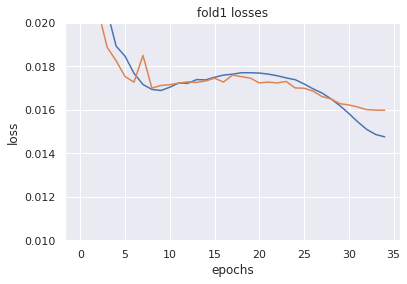

==========FOLD2==========
-----EPOCH1-----
train_loss: 0.73744, train_metric: 0.73743
valid_loss: 0.64922, valid_metric: 0.64917
-----EPOCH2-----
train_loss: 0.27132, train_metric: 0.27038
valid_loss: 0.03370, valid_metric: 0.03170
-----EPOCH3-----
train_loss: 0.02811, train_metric: 0.02565
valid_loss: 0.02469, valid_metric: 0.02193
-----EPOCH4-----
train_loss: 0.02321, train_metric: 0.02025
valid_loss: 0.02175, valid_metric: 0.01869
-----EPOCH5-----
train_loss: 0.02207, train_metric: 0.01895
valid_loss: 0.02116, valid_metric: 0.01799
-----EPOCH6-----
train_loss: 0.02157, train_metric: 0.01835
valid_loss: 0.02087, valid_metric: 0.01765
-----EPOCH7-----
train_loss: 0.02085, train_metric: 0.01761
valid_loss: 0.02045, valid_metric: 0.01718
-----EPOCH8-----
train_loss: 0.02035, train_metric: 0.01711
valid_loss: 0.02044, valid_metric: 0.01722
-----EPOCH9-----
train_loss: 0.02004, train_metric: 0.01682
valid_loss: 0.02027, valid_metric: 0.01707
-----EPOCH10-----
train_loss: 0.02012, train_me

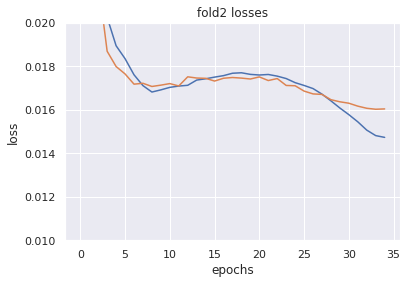

==========FOLD3==========
-----EPOCH1-----
train_loss: 0.73714, train_metric: 0.73713
valid_loss: 0.64256, valid_metric: 0.64249
-----EPOCH2-----
train_loss: 0.26965, train_metric: 0.26871
valid_loss: 0.03646, valid_metric: 0.03448
-----EPOCH3-----
train_loss: 0.02778, train_metric: 0.02532
valid_loss: 0.02315, valid_metric: 0.02038
-----EPOCH4-----
train_loss: 0.02347, train_metric: 0.02052
valid_loss: 0.02174, valid_metric: 0.01871
-----EPOCH5-----
train_loss: 0.02220, train_metric: 0.01907
valid_loss: 0.02103, valid_metric: 0.01785
-----EPOCH6-----
train_loss: 0.02150, train_metric: 0.01829
valid_loss: 0.02086, valid_metric: 0.01764
-----EPOCH7-----
train_loss: 0.02091, train_metric: 0.01769
valid_loss: 0.02049, valid_metric: 0.01725
-----EPOCH8-----
train_loss: 0.02041, train_metric: 0.01718
valid_loss: 0.02022, valid_metric: 0.01705
-----EPOCH9-----
train_loss: 0.02021, train_metric: 0.01700
valid_loss: 0.02017, valid_metric: 0.01696
-----EPOCH10-----
train_loss: 0.02016, train_me

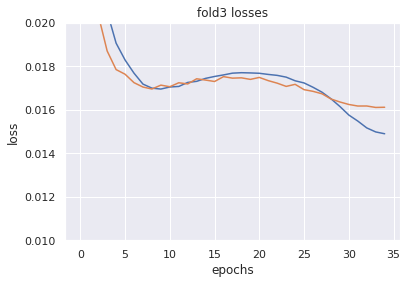

==========FOLD4==========
-----EPOCH1-----
train_loss: 0.73757, train_metric: 0.73756
valid_loss: 0.64662, valid_metric: 0.64656
-----EPOCH2-----
train_loss: 0.27035, train_metric: 0.26942
valid_loss: 0.03544, valid_metric: 0.03343
-----EPOCH3-----
train_loss: 0.02782, train_metric: 0.02538
valid_loss: 0.02305, valid_metric: 0.02028
-----EPOCH4-----
train_loss: 0.02307, train_metric: 0.02014
valid_loss: 0.02161, valid_metric: 0.01852
-----EPOCH5-----
train_loss: 0.02217, train_metric: 0.01905
valid_loss: 0.02121, valid_metric: 0.01801
-----EPOCH6-----
train_loss: 0.02150, train_metric: 0.01829
valid_loss: 0.02089, valid_metric: 0.01767
-----EPOCH7-----
train_loss: 0.02087, train_metric: 0.01765
valid_loss: 0.02048, valid_metric: 0.01727
-----EPOCH8-----
train_loss: 0.02034, train_metric: 0.01711
valid_loss: 0.02026, valid_metric: 0.01704
-----EPOCH9-----
train_loss: 0.02015, train_metric: 0.01693
valid_loss: 0.02018, valid_metric: 0.01694
-----EPOCH10-----
train_loss: 0.02013, train_me

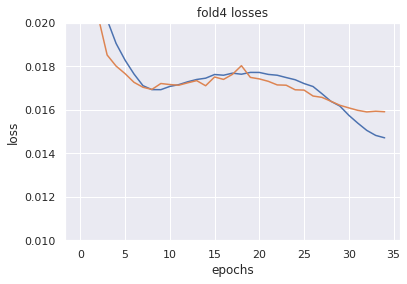

==========FOLD5==========
-----EPOCH1-----
train_loss: 0.73691, train_metric: 0.73690
valid_loss: 0.64036, valid_metric: 0.64030
-----EPOCH2-----
train_loss: 0.26822, train_metric: 0.26728
valid_loss: 0.03471, valid_metric: 0.03271
-----EPOCH3-----
train_loss: 0.02812, train_metric: 0.02567
valid_loss: 0.02303, valid_metric: 0.02028
-----EPOCH4-----
train_loss: 0.02347, train_metric: 0.02053
valid_loss: 0.02173, valid_metric: 0.01870
-----EPOCH5-----
train_loss: 0.02227, train_metric: 0.01914
valid_loss: 0.02152, valid_metric: 0.01830
-----EPOCH6-----
train_loss: 0.02159, train_metric: 0.01837
valid_loss: 0.02090, valid_metric: 0.01763
-----EPOCH7-----
train_loss: 0.02097, train_metric: 0.01774
valid_loss: 0.02074, valid_metric: 0.01753
-----EPOCH8-----
train_loss: 0.02044, train_metric: 0.01721
valid_loss: 0.02049, valid_metric: 0.01734
-----EPOCH9-----
train_loss: 0.02017, train_metric: 0.01695
valid_loss: 0.02026, valid_metric: 0.01702
-----EPOCH10-----
train_loss: 0.02014, train_me

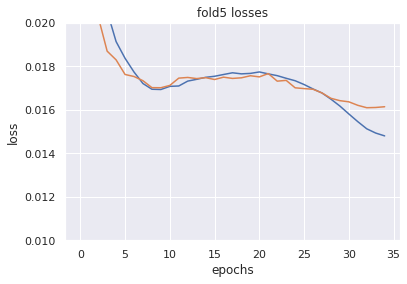

 
SEED : 1

==========FOLD1==========
-----EPOCH1-----
train_loss: 0.73750, train_metric: 0.73749
valid_loss: 0.64227, valid_metric: 0.64220
-----EPOCH2-----
train_loss: 0.27013, train_metric: 0.26920
valid_loss: 0.03347, valid_metric: 0.03147
-----EPOCH3-----
train_loss: 0.02788, train_metric: 0.02543
valid_loss: 0.02306, valid_metric: 0.02031
-----EPOCH4-----
train_loss: 0.02312, train_metric: 0.02019
valid_loss: 0.02184, valid_metric: 0.01885
-----EPOCH5-----
train_loss: 0.02228, train_metric: 0.01915
valid_loss: 0.02141, valid_metric: 0.01822
-----EPOCH6-----
train_loss: 0.02136, train_metric: 0.01814
valid_loss: 0.02091, valid_metric: 0.01768
-----EPOCH7-----
train_loss: 0.02089, train_metric: 0.01765
valid_loss: 0.02066, valid_metric: 0.01747
-----EPOCH8-----
train_loss: 0.02042, train_metric: 0.01719
valid_loss: 0.02027, valid_metric: 0.01705
-----EPOCH9-----
train_loss: 0.02014, train_metric: 0.01692
valid_loss: 0.02030, valid_metric: 0.01707
-----EPOCH10-----
train_loss: 0.020

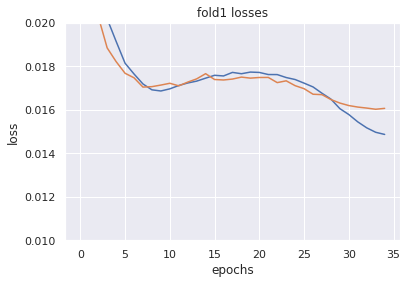

==========FOLD2==========
-----EPOCH1-----
train_loss: 0.73761, train_metric: 0.73760
valid_loss: 0.63521, valid_metric: 0.63514
-----EPOCH2-----
train_loss: 0.26950, train_metric: 0.26857
valid_loss: 0.03322, valid_metric: 0.03120
-----EPOCH3-----
train_loss: 0.02815, train_metric: 0.02570
valid_loss: 0.02306, valid_metric: 0.02027
-----EPOCH4-----
train_loss: 0.02324, train_metric: 0.02030
valid_loss: 0.02163, valid_metric: 0.01858
-----EPOCH5-----
train_loss: 0.02206, train_metric: 0.01893
valid_loss: 0.02114, valid_metric: 0.01800
-----EPOCH6-----
train_loss: 0.02162, train_metric: 0.01842
valid_loss: 0.02151, valid_metric: 0.01837
-----EPOCH7-----
train_loss: 0.02095, train_metric: 0.01772
valid_loss: 0.02053, valid_metric: 0.01733
-----EPOCH8-----
train_loss: 0.02039, train_metric: 0.01716
valid_loss: 0.02036, valid_metric: 0.01713
-----EPOCH9-----
train_loss: 0.02015, train_metric: 0.01693
valid_loss: 0.02030, valid_metric: 0.01714
-----EPOCH10-----
train_loss: 0.02012, train_me

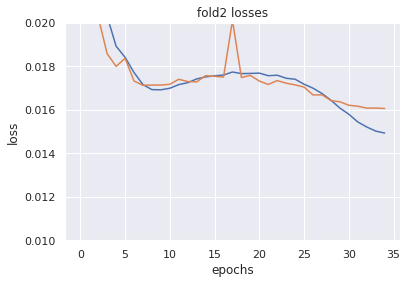

==========FOLD3==========
-----EPOCH1-----
train_loss: 0.73736, train_metric: 0.73735
valid_loss: 0.63802, valid_metric: 0.63795
-----EPOCH2-----
train_loss: 0.26945, train_metric: 0.26851
valid_loss: 0.03410, valid_metric: 0.03211
-----EPOCH3-----
train_loss: 0.02799, train_metric: 0.02555
valid_loss: 0.02305, valid_metric: 0.02031
-----EPOCH4-----
train_loss: 0.02340, train_metric: 0.02046
valid_loss: 0.02166, valid_metric: 0.01860
-----EPOCH5-----
train_loss: 0.02233, train_metric: 0.01921
valid_loss: 0.02147, valid_metric: 0.01828
-----EPOCH6-----
train_loss: 0.02157, train_metric: 0.01836
valid_loss: 0.02073, valid_metric: 0.01751
-----EPOCH7-----
train_loss: 0.02109, train_metric: 0.01786
valid_loss: 0.02052, valid_metric: 0.01720
-----EPOCH8-----
train_loss: 0.02044, train_metric: 0.01721
valid_loss: 0.02026, valid_metric: 0.01706
-----EPOCH9-----
train_loss: 0.02022, train_metric: 0.01700
valid_loss: 0.02037, valid_metric: 0.01715
-----EPOCH10-----
train_loss: 0.02022, train_me

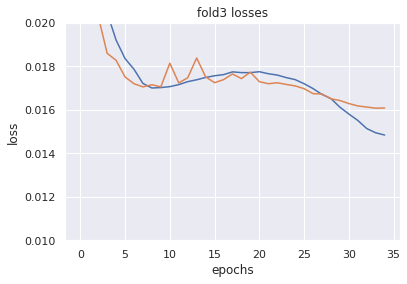

==========FOLD4==========
-----EPOCH1-----
train_loss: 0.73758, train_metric: 0.73757
valid_loss: 0.64439, valid_metric: 0.64433
-----EPOCH2-----
train_loss: 0.27020, train_metric: 0.26926
valid_loss: 0.03588, valid_metric: 0.03389
-----EPOCH3-----
train_loss: 0.02804, train_metric: 0.02560
valid_loss: 0.02319, valid_metric: 0.02044
-----EPOCH4-----
train_loss: 0.02324, train_metric: 0.02030
valid_loss: 0.02179, valid_metric: 0.01873
-----EPOCH5-----
train_loss: 0.02250, train_metric: 0.01936
valid_loss: 0.02136, valid_metric: 0.01817
-----EPOCH6-----
train_loss: 0.02156, train_metric: 0.01835
valid_loss: 0.02074, valid_metric: 0.01755
-----EPOCH7-----
train_loss: 0.02115, train_metric: 0.01792
valid_loss: 0.02064, valid_metric: 0.01744
-----EPOCH8-----
train_loss: 0.02052, train_metric: 0.01731
valid_loss: 0.02038, valid_metric: 0.01718
-----EPOCH9-----
train_loss: 0.02029, train_metric: 0.01708
valid_loss: 0.02022, valid_metric: 0.01710
-----EPOCH10-----
train_loss: 0.02018, train_me

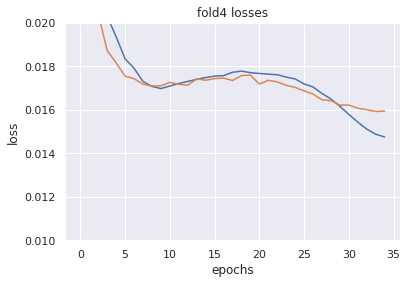

==========FOLD5==========
-----EPOCH1-----
train_loss: 0.73740, train_metric: 0.73739
valid_loss: 0.64977, valid_metric: 0.64972
-----EPOCH2-----
train_loss: 0.27027, train_metric: 0.26933
valid_loss: 0.03582, valid_metric: 0.03385
-----EPOCH3-----
train_loss: 0.02822, train_metric: 0.02577
valid_loss: 0.02364, valid_metric: 0.02088
-----EPOCH4-----
train_loss: 0.02319, train_metric: 0.02026
valid_loss: 0.02167, valid_metric: 0.01859
-----EPOCH5-----
train_loss: 0.02223, train_metric: 0.01910
valid_loss: 0.02165, valid_metric: 0.01843
-----EPOCH6-----
train_loss: 0.02148, train_metric: 0.01827
valid_loss: 0.02103, valid_metric: 0.01784
-----EPOCH7-----
train_loss: 0.02086, train_metric: 0.01763
valid_loss: 0.02056, valid_metric: 0.01733
-----EPOCH8-----
train_loss: 0.02039, train_metric: 0.01715
valid_loss: 0.02039, valid_metric: 0.01714
-----EPOCH9-----
train_loss: 0.02018, train_metric: 0.01696
valid_loss: 0.02030, valid_metric: 0.01709
-----EPOCH10-----
train_loss: 0.02014, train_me

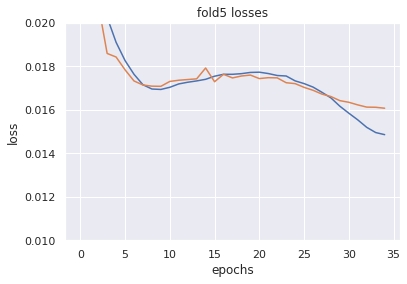

In [32]:
# Averaging on multiple SEEDS

SEED = [0, 1]
oof = np.zeros((len(train), len(target_cols)))
predictions = np.zeros((len(test), len(target_cols)))
CVs = list()

print(f'device used: {DEVICE}')

for seed in SEED:
    
    print(f' ')
    print(f'SEED : {seed}')
    print(f'')
    
    oof_, predictions_, CVs_ = run_k_fold(NFOLDS, seed, EPOCHS, LEARNING_RATE)
    oof += oof_ / len(SEED)
    predictions += predictions_ / len(SEED)
    CVs += CVs_
    
train[target_cols] = oof
test[target_cols] = predictions

In [33]:
valid_results = train_targets_scored.drop(columns=target_cols).merge(
    train[['sig_id']+target_cols], on='sig_id', how='left').fillna(0)

y_true = train_targets_scored[target_cols].values
y_pred = valid_results[target_cols].values

cv = 0
for i in range(len(target_cols)):
    cv_ = log_loss(y_true[:, i], y_pred[:, i])
    cv += cv_ / len(target_cols)
    
auc = 0
for i in range(len(target_cols)):
    auc_ = roc_auc_score(y_true[:, i], y_pred[:, i])
    auc += auc_ / len(target_cols)
    
print(f'CV log_loss: {cv:.6f} +/- {np.std(CVs):.6f}')
print(f'AUC: {auc:.6f}')

CV log_loss: 0.014839 +/- 0.000370
AUC: 0.806621


In [34]:
file_path = 'oof_Simple.npy'
np.save(file_path, oof)

submission_Simple2 = sample_submission.drop(columns=target_cols).merge(
    test[['sig_id']+target_cols], on='sig_id', how='left').fillna(0).iloc[:, 1:]
# sub.to_csv('submission.csv', index=False)

In [35]:
submission_Simple = submission_Simple1 * 0.8 + submission_Simple2 * 0.2

## Model ResNet

In [36]:
DEVICE = ('cuda' if torch.cuda.is_available() else 'cpu')
EPOCHS = 35
BATCH_SIZE = 128
BATCH_SIZE_nonscored = 512
LEARNING_RATE = 1e-2
WEIGHT_DECAY = 1e-5
NFOLDS = 5
EARLY_STOPPING_STEPS = 10
EARLY_STOP = False
EARLY_STOPPING_STEPS_nonscored = 4
EARLY_STOP_nonscored = True
smoothing = 0.001
p_min = smoothing
p_max = 1 - smoothing

num_features_1 = len(feature_cols)
num_features_2 = len(predictors)
num_targets = len(target_cols)
hidden_1 = 256
hidden_2 = 256

In [37]:
def train_fn(model, optimizer, scheduler, loss_tr, loss_fn, dataloader, device):
    rejected = 0
    model.train()
    final_loss = 0
    final_metric = 0
    
    for data in dataloader:
        optimizer.zero_grad()
        inputs, targets = data['x'].to(device), data['y'].to(device)
        if len(inputs) > 1: 
            inputs1 = inputs[:, :-len(predictors)]
            inputs2 = inputs[:, -len(predictors):]
            outputs = model(inputs1, inputs2)
            loss = loss_tr(outputs, targets)
            metric = loss_fn(outputs, targets)
            loss.backward()
            optimizer.step()
            scheduler.step()
        
            final_loss += loss.item()
            final_metric += metric.item()
            
        else:
            rejected += len(inputs)
        
    final_loss /= (len(dataloader) - rejected)
    final_metric /= (len(dataloader) - rejected)
    
    return final_loss, final_metric

In [38]:
def valid_fn(model, loss_tr, loss_fn, dataloader, device):
    model.eval()
    final_loss = 0
    final_metric = 0
    valid_preds = []
    
    for data in dataloader:
        
        inputs, targets = data['x'].to(device), data['y'].to(device)
        inputs1 = inputs[:, :-len(predictors)]
        inputs2 = inputs[:, -len(predictors):]
        outputs = model(inputs1, inputs2)
        loss = loss_tr(outputs, targets)
        metric = loss_fn(outputs, targets)
        final_loss += loss.item()
        final_metric += metric.item()
        outputs = torch.clamp(torch.sigmoid(outputs).detach().cpu(), p_min, p_max)
        valid_preds.append(outputs.numpy())
        
    final_loss /= len(dataloader)
    final_metric /= len(dataloader)
    valid_preds = np.concatenate(valid_preds)
        
    return final_loss, final_metric, valid_preds

In [39]:
def inference_fn(model, dataloader, device):
    model.eval()
    preds = []
    
    for data in dataloader:
        inputs = data['x'].to(device)
        inputs1 = inputs[:, :-len(predictors)]
        inputs2 = inputs[:, -len(predictors):]
        
        with torch.no_grad():
            outputs = model(inputs1, inputs2)
            
        outputs = torch.clamp(torch.sigmoid(outputs).detach().cpu(), p_min, p_max)    
        preds.append(outputs.numpy())
        
    preds = np.concatenate(preds)
        
    return preds

In [40]:
def run_training(fold, seed, EPOCHS, LEARNING_RATE):
    
    print(f'==========FOLD{fold+1}==========')
    
    
    seed_everything(seed)
    
    train_losses = list()
    valid_losses = list()
    train_losses_nonscored = list()
    valid_losses_nonscored = list()
    
    train = pd.get_dummies(folds, columns=['cp_time', 'cp_dose'])
    test_ = pd.get_dummies(test, columns=['cp_time', 'cp_dose'])
    
    trn_idx = train[train['kfold'] != fold].index
    val_idx = train[train['kfold'] == fold].index
    
    train_df = train[train['kfold'] != fold].reset_index()
    valid_df = train[train['kfold'] == fold].reset_index()
    
    x_train, y_train, y_train_nonscored = train_df[feature_cols].values, train_df[target_cols].values, train_df[target_nonscored_cols].values
    x_valid, y_valid, y_valid_nonscored = valid_df[feature_cols].values, valid_df[target_cols].values, valid_df[target_nonscored_cols].values
    
    x_train2 = train_df[predictors].values
    x_valid2 = valid_df[predictors].values
    
    x_train = np.concatenate([x_train, x_train2], axis=1)
    x_valid = np.concatenate([x_valid, x_valid2], axis=1)
    
    train_dataset = MoADataset(x_train, y_train)
    train_dataset_nonscored = MoADataset(x_train, y_train_nonscored)
    valid_dataset = MoADataset(x_valid, y_valid)
    valid_dataset_nonscored = MoADataset(x_valid, y_valid_nonscored)
    
    trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    trainloader_nonscored = torch.utils.data.DataLoader(train_dataset_nonscored, batch_size=BATCH_SIZE_nonscored, shuffle=True)
    validloader = torch.utils.data.DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)
    validloader_nonscored = torch.utils.data.DataLoader(valid_dataset_nonscored, batch_size=BATCH_SIZE_nonscored, shuffle=False)
    
    model = Model_ResNet(num_features_1=num_features_1,
                      num_features_2=num_features_2, 
                      num_targets=num_targets, 
                      hidden_1=hidden_1,
                      hidden_2=hidden_2)
    

    model.to(DEVICE)
    
    optimizer_nonscored = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
    scheduler_nonscored = optim.lr_scheduler.OneCycleLR(optimizer=optimizer_nonscored, pct_start=0.3, div_factor=1e3, 
                                              max_lr=1e-2, epochs=EPOCHS, steps_per_epoch=len(trainloader_nonscored)) 
    
    loss_fn = nn.BCEWithLogitsLoss()
    loss_tr = SmoothBCEwLogits(smoothing=smoothing)
    
    early_stoppping_steps = EARLY_STOPPING_STEPS
    early_step = 0
    early_step_nonscored = 0
    
    oof = np.zeros((len(train), target.iloc[:, 1:].shape[1]))
    best_loss = np.inf
    
    print('nonscored-loop')
    
    for epoch in range(EPOCHS):
        
        print(f'-----EPOCH{epoch+1}-----')
        
        train_loss, train_metric = train_fn(model, optimizer_nonscored, scheduler_nonscored, loss_tr, loss_fn, trainloader_nonscored, DEVICE)
        print(f'train_loss: {train_loss:.5f}, train_metric: {train_metric:.5f}')
        train_losses_nonscored.append(train_metric)
        valid_loss, valid_metric, valid_preds = valid_fn(model, loss_tr, loss_fn, validloader_nonscored, DEVICE)
        print(f'valid_loss: {valid_loss:.5f}, valid_metric: {valid_metric:.5f}')
        valid_losses_nonscored.append(valid_metric)
        
        if valid_loss < best_loss:
            
            early_step_nonscored = 0
            best_loss = valid_loss
#             oof[val_idx] = valid_preds
            torch.save(model.state_dict(), f'ResNet_FOLD{fold+1}_SEED{seed}.pth')
            
        elif(EARLY_STOP_nonscored == True):
            
            early_step_nonscored += 1
            if (early_step_nonscored >= EARLY_STOPPING_STEPS_nonscored):
                print('early_stopping')
                break
    
    plt.plot(train_losses_nonscored, label='train_losses')
    plt.plot(valid_losses_nonscored, label='valid_losses')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.ylim([1e-3, 1e-2])
    plt.title(f'fold{fold+1} losses')
    plt.legend(loc='best')
    plt.show()
    
    
    model.load_state_dict(torch.load(f'ResNet_FOLD{fold+1}_SEED{seed}.pth'))
    model.Linear3_2 = nn.Linear(hidden_2, num_targets)
    model.to(DEVICE)
    
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
    scheduler = optim.lr_scheduler.OneCycleLR(optimizer=optimizer, pct_start=0.3, div_factor=1e3, 
                                              max_lr=1e-2, epochs=EPOCHS, steps_per_epoch=len(trainloader)) 
    
    best_loss = np.inf
    
    print('scored_loop')
    
    for epoch in range(EPOCHS):
        
        print(f'-----EPOCH{epoch+1}-----')
        
        train_loss, train_metric = train_fn(model, optimizer, scheduler, loss_tr, loss_fn, trainloader, DEVICE)
        print(f'train_loss: {train_loss:.5f}, train_metric: {train_metric:.5f}')
        train_losses.append(train_metric)
        valid_loss, valid_metric, valid_preds = valid_fn(model, loss_tr, loss_fn, validloader, DEVICE)
        print(f'valid_loss: {valid_loss:.5f}, valid_metric: {valid_metric:.5f}')
        valid_losses.append(valid_metric)
        
        if valid_loss < best_loss:
            
            best_loss = valid_loss
            oof[val_idx] = valid_preds
            torch.save(model.state_dict(), f'ResNet_FOLD{fold+1}_SEED{seed}.pth')
            
        elif(EARLY_STOP == True):
            
            early_step += 1
            if (early_step >= EARLY_STOPPING_STEPS):
                break
                
    y_true = train_targets_scored[target_cols].values

    cv = 0
    for i in range(len(target_cols)):
        cv_ = log_loss(y_true[val_idx, i], oof[val_idx, i], labels=[0, 1])
        cv += cv_ / len(target_cols)
                
    plt.plot(train_losses, label='train_losses')
    plt.plot(valid_losses, label='valid_losses')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.ylim([1e-2, 2e-2])
    plt.title(f'fold{fold+1} losses')
    plt.legend(loc='best')
    plt.show()
                
    #-----------------------PREDICTION-------------------------
                
    x_test = test_[feature_cols].values
    x_test2 = test_[predictors].values
    
    x_test = np.concatenate([x_test, x_test2], axis=1)
    testdataset = TestDataset(x_test)
    testloader = torch.utils.data.DataLoader(testdataset, batch_size=BATCH_SIZE, shuffle=False)
    
    model = Model_ResNet(num_features_1=num_features_1,
                      num_features_2=num_features_2, 
                      num_targets=num_targets, 
                      hidden_1=hidden_1,
                      hidden_2=hidden_2)
    
    model.load_state_dict(torch.load(f'ResNet_FOLD{fold+1}_SEED{seed}.pth'))
    model.to(DEVICE)
    
    predictions = np.zeros((len(test_), target.iloc[:, 1:].shape[1]))
    predictions = inference_fn(model, testloader, DEVICE)
    
    return oof, predictions, cv

In [41]:
def run_k_fold(NFOLD, seed, EPOCH, LEARNING_RATE):
    oof = np.zeros((len(train), len(target_cols)))
    predictions = np.zeros((len(test), len(target_cols)))
    CVs = list()
    
    for fold in range(NFOLDS):
        oof_, pred_, cv_ = run_training(fold, seed, EPOCH, LEARNING_RATE)
        
        predictions += pred_ / NFOLDS
        oof += oof_
        CVs.append(cv_)
        
    return oof, predictions, CVs

used device: cuda
 
SEED : 0

==========FOLD1==========
nonscored-loop
-----EPOCH1-----
train_loss: 0.72605, train_metric: 0.72605
valid_loss: 0.69953, valid_metric: 0.69952
-----EPOCH2-----
train_loss: 0.69191, train_metric: 0.69190
valid_loss: 0.68393, valid_metric: 0.68391
-----EPOCH3-----
train_loss: 0.52180, train_metric: 0.52159
valid_loss: 0.23122, valid_metric: 0.23053
-----EPOCH4-----
train_loss: 0.06235, train_metric: 0.06057
valid_loss: 0.01171, valid_metric: 0.00888
-----EPOCH5-----
train_loss: 0.01103, train_metric: 0.00790
valid_loss: 0.01074, valid_metric: 0.00747
-----EPOCH6-----
train_loss: 0.01075, train_metric: 0.00748
valid_loss: 0.01073, valid_metric: 0.00753
-----EPOCH7-----
train_loss: 0.01074, train_metric: 0.00754
valid_loss: 0.01075, valid_metric: 0.00758
-----EPOCH8-----
train_loss: 0.01074, train_metric: 0.00757
valid_loss: 0.01066, valid_metric: 0.00742
-----EPOCH9-----
train_loss: 0.01064, train_metric: 0.00748
valid_loss: 0.01067, valid_metric: 0.00745
--

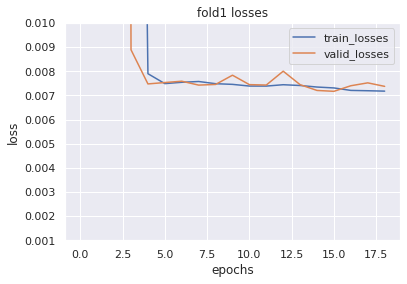

scored_loop
-----EPOCH1-----
train_loss: 0.62011, train_metric: 0.62001
valid_loss: 0.39759, valid_metric: 0.39721
-----EPOCH2-----
train_loss: 0.15747, train_metric: 0.15641
valid_loss: 0.04210, valid_metric: 0.04035
-----EPOCH3-----
train_loss: 0.02868, train_metric: 0.02649
valid_loss: 0.02288, valid_metric: 0.02037
-----EPOCH4-----
train_loss: 0.02189, train_metric: 0.01919
valid_loss: 0.02147, valid_metric: 0.01866
-----EPOCH5-----
train_loss: 0.02105, train_metric: 0.01812
valid_loss: 0.02068, valid_metric: 0.01773
-----EPOCH6-----
train_loss: 0.02082, train_metric: 0.01780
valid_loss: 0.02054, valid_metric: 0.01752
-----EPOCH7-----
train_loss: 0.02072, train_metric: 0.01767
valid_loss: 0.02063, valid_metric: 0.01757
-----EPOCH8-----
train_loss: 0.02073, train_metric: 0.01769
valid_loss: 0.02071, valid_metric: 0.01776
-----EPOCH9-----
train_loss: 0.02077, train_metric: 0.01772
valid_loss: 0.02052, valid_metric: 0.01736
-----EPOCH10-----
train_loss: 0.02078, train_metric: 0.01773


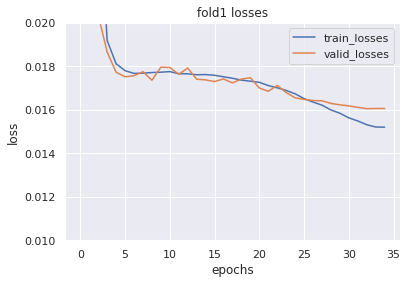

==========FOLD2==========
nonscored-loop
-----EPOCH1-----
train_loss: 0.72611, train_metric: 0.72611
valid_loss: 0.69991, valid_metric: 0.69991
-----EPOCH2-----
train_loss: 0.69184, train_metric: 0.69183
valid_loss: 0.67553, valid_metric: 0.67550
-----EPOCH3-----
train_loss: 0.52238, train_metric: 0.52217
valid_loss: 0.23589, valid_metric: 0.23522
-----EPOCH4-----
train_loss: 0.06265, train_metric: 0.06087
valid_loss: 0.01205, valid_metric: 0.00924
-----EPOCH5-----
train_loss: 0.01097, train_metric: 0.00784
valid_loss: 0.01109, valid_metric: 0.00784
-----EPOCH6-----
train_loss: 0.01069, train_metric: 0.00743
valid_loss: 0.01105, valid_metric: 0.00776
-----EPOCH7-----
train_loss: 0.01063, train_metric: 0.00743
valid_loss: 0.01102, valid_metric: 0.00780
-----EPOCH8-----
train_loss: 0.01063, train_metric: 0.00746
valid_loss: 0.01116, valid_metric: 0.00808
-----EPOCH9-----
train_loss: 0.01059, train_metric: 0.00742
valid_loss: 0.01100, valid_metric: 0.00776
-----EPOCH10-----
train_loss: 0.

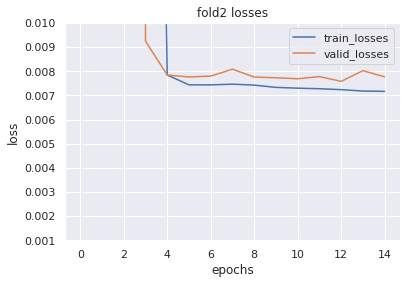

scored_loop
-----EPOCH1-----
train_loss: 0.63386, train_metric: 0.63376
valid_loss: 0.41183, valid_metric: 0.41147
-----EPOCH2-----
train_loss: 0.16702, train_metric: 0.16599
valid_loss: 0.04259, valid_metric: 0.04084
-----EPOCH3-----
train_loss: 0.02901, train_metric: 0.02682
valid_loss: 0.02283, valid_metric: 0.02029
-----EPOCH4-----
train_loss: 0.02188, train_metric: 0.01916
valid_loss: 0.02129, valid_metric: 0.01851
-----EPOCH5-----
train_loss: 0.02098, train_metric: 0.01803
valid_loss: 0.02089, valid_metric: 0.01779
-----EPOCH6-----
train_loss: 0.02084, train_metric: 0.01781
valid_loss: 0.02062, valid_metric: 0.01764
-----EPOCH7-----
train_loss: 0.02081, train_metric: 0.01776
valid_loss: 0.02049, valid_metric: 0.01742
-----EPOCH8-----
train_loss: 0.02082, train_metric: 0.01776
valid_loss: 0.02060, valid_metric: 0.01753
-----EPOCH9-----
train_loss: 0.02066, train_metric: 0.01761
valid_loss: 0.02066, valid_metric: 0.01750
-----EPOCH10-----
train_loss: 0.02078, train_metric: 0.01772


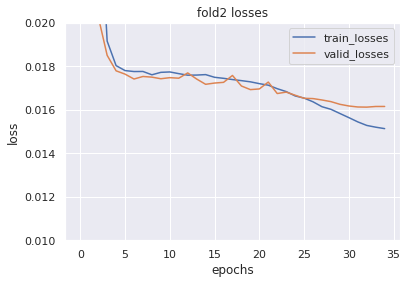

==========FOLD3==========
nonscored-loop
-----EPOCH1-----
train_loss: 0.72611, train_metric: 0.72611
valid_loss: 0.69866, valid_metric: 0.69865
-----EPOCH2-----
train_loss: 0.69193, train_metric: 0.69192
valid_loss: 0.68294, valid_metric: 0.68292
-----EPOCH3-----
train_loss: 0.52219, train_metric: 0.52198
valid_loss: 0.23490, valid_metric: 0.23422
-----EPOCH4-----
train_loss: 0.06266, train_metric: 0.06088
valid_loss: 0.01197, valid_metric: 0.00918
-----EPOCH5-----
train_loss: 0.01098, train_metric: 0.00785
valid_loss: 0.01092, valid_metric: 0.00764
-----EPOCH6-----
train_loss: 0.01072, train_metric: 0.00746
valid_loss: 0.01086, valid_metric: 0.00763
-----EPOCH7-----
train_loss: 0.01069, train_metric: 0.00749
valid_loss: 0.01086, valid_metric: 0.00761
-----EPOCH8-----
train_loss: 0.01071, train_metric: 0.00754
valid_loss: 0.01083, valid_metric: 0.00765
-----EPOCH9-----
train_loss: 0.01062, train_metric: 0.00745
valid_loss: 0.01082, valid_metric: 0.00765
-----EPOCH10-----
train_loss: 0.

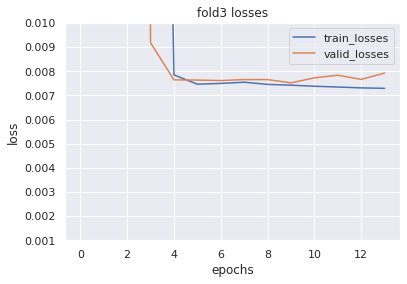

scored_loop
-----EPOCH1-----
train_loss: 0.63387, train_metric: 0.63378
valid_loss: 0.42853, valid_metric: 0.42819
-----EPOCH2-----
train_loss: 0.16998, train_metric: 0.16896
valid_loss: 0.04396, valid_metric: 0.04224
-----EPOCH3-----
train_loss: 0.02901, train_metric: 0.02682
valid_loss: 0.02263, valid_metric: 0.02004
-----EPOCH4-----
train_loss: 0.02191, train_metric: 0.01920
valid_loss: 0.02119, valid_metric: 0.01838
-----EPOCH5-----
train_loss: 0.02102, train_metric: 0.01807
valid_loss: 0.02057, valid_metric: 0.01750
-----EPOCH6-----
train_loss: 0.02080, train_metric: 0.01776
valid_loss: 0.02066, valid_metric: 0.01765
-----EPOCH7-----
train_loss: 0.02082, train_metric: 0.01776
valid_loss: 0.02045, valid_metric: 0.01738
-----EPOCH8-----
train_loss: 0.02075, train_metric: 0.01770
valid_loss: 0.02084, valid_metric: 0.01785
-----EPOCH9-----
train_loss: 0.02078, train_metric: 0.01773
valid_loss: 0.02069, valid_metric: 0.01763
-----EPOCH10-----
train_loss: 0.02073, train_metric: 0.01768


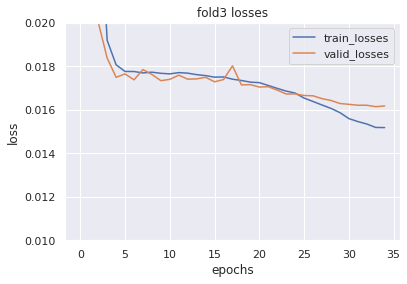

==========FOLD4==========
nonscored-loop
-----EPOCH1-----
train_loss: 0.72607, train_metric: 0.72606
valid_loss: 0.69897, valid_metric: 0.69896
-----EPOCH2-----
train_loss: 0.69190, train_metric: 0.69189
valid_loss: 0.67858, valid_metric: 0.67856
-----EPOCH3-----
train_loss: 0.52161, train_metric: 0.52140
valid_loss: 0.23391, valid_metric: 0.23323
-----EPOCH4-----
train_loss: 0.06221, train_metric: 0.06042
valid_loss: 0.01187, valid_metric: 0.00907
-----EPOCH5-----
train_loss: 0.01098, train_metric: 0.00785
valid_loss: 0.01076, valid_metric: 0.00747
-----EPOCH6-----
train_loss: 0.01078, train_metric: 0.00752
valid_loss: 0.01076, valid_metric: 0.00756
-----EPOCH7-----
train_loss: 0.01074, train_metric: 0.00754
valid_loss: 0.01075, valid_metric: 0.00754
-----EPOCH8-----
train_loss: 0.01072, train_metric: 0.00755
valid_loss: 0.01072, valid_metric: 0.00754
-----EPOCH9-----
train_loss: 0.01064, train_metric: 0.00748
valid_loss: 0.01071, valid_metric: 0.00749
-----EPOCH10-----
train_loss: 0.

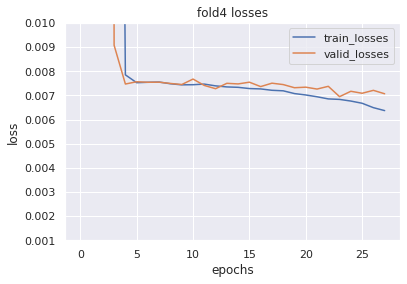

scored_loop
-----EPOCH1-----
train_loss: 0.58846, train_metric: 0.58833
valid_loss: 0.35389, valid_metric: 0.35344
-----EPOCH2-----
train_loss: 0.13820, train_metric: 0.13706
valid_loss: 0.03995, valid_metric: 0.03816
-----EPOCH3-----
train_loss: 0.02807, train_metric: 0.02586
valid_loss: 0.02251, valid_metric: 0.01995
-----EPOCH4-----
train_loss: 0.02192, train_metric: 0.01922
valid_loss: 0.02099, valid_metric: 0.01805
-----EPOCH5-----
train_loss: 0.02116, train_metric: 0.01825
valid_loss: 0.02153, valid_metric: 0.01845
-----EPOCH6-----
train_loss: 0.02097, train_metric: 0.01797
valid_loss: 0.02075, valid_metric: 0.01772
-----EPOCH7-----
train_loss: 0.02093, train_metric: 0.01791
valid_loss: 0.02113, valid_metric: 0.01807
-----EPOCH8-----
train_loss: 0.02108, train_metric: 0.01805
valid_loss: 0.02158, valid_metric: 0.01855
-----EPOCH9-----
train_loss: 0.02095, train_metric: 0.01790
valid_loss: 0.02060, valid_metric: 0.01748
-----EPOCH10-----
train_loss: 0.02084, train_metric: 0.01779


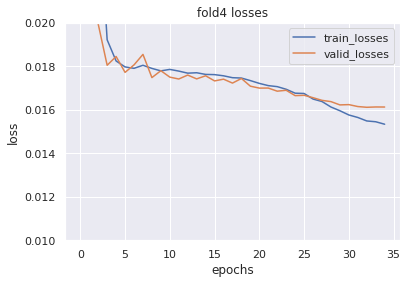

==========FOLD5==========
nonscored-loop
-----EPOCH1-----
train_loss: 0.72612, train_metric: 0.72612
valid_loss: 0.69884, valid_metric: 0.69883
-----EPOCH2-----
train_loss: 0.69198, train_metric: 0.69197
valid_loss: 0.68357, valid_metric: 0.68356
-----EPOCH3-----
train_loss: 0.52216, train_metric: 0.52195
valid_loss: 0.23673, valid_metric: 0.23606
-----EPOCH4-----
train_loss: 0.06265, train_metric: 0.06086
valid_loss: 0.01187, valid_metric: 0.00909
-----EPOCH5-----
train_loss: 0.01102, train_metric: 0.00789
valid_loss: 0.01070, valid_metric: 0.00744
-----EPOCH6-----
train_loss: 0.01080, train_metric: 0.00754
valid_loss: 0.01063, valid_metric: 0.00731
-----EPOCH7-----
train_loss: 0.01079, train_metric: 0.00759
valid_loss: 0.01072, valid_metric: 0.00759
-----EPOCH8-----
train_loss: 0.01072, train_metric: 0.00755
valid_loss: 0.01066, valid_metric: 0.00749
-----EPOCH9-----
train_loss: 0.01069, train_metric: 0.00752
valid_loss: 0.01063, valid_metric: 0.00746
-----EPOCH10-----
train_loss: 0.

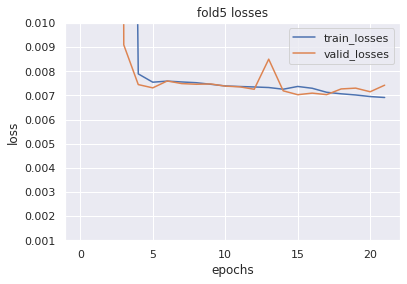

scored_loop
-----EPOCH1-----
train_loss: 0.60611, train_metric: 0.60600
valid_loss: 0.37203, valid_metric: 0.37161
-----EPOCH2-----
train_loss: 0.14890, train_metric: 0.14781
valid_loss: 0.03998, valid_metric: 0.03818
-----EPOCH3-----
train_loss: 0.02834, train_metric: 0.02614
valid_loss: 0.02357, valid_metric: 0.02113
-----EPOCH4-----
train_loss: 0.02181, train_metric: 0.01911
valid_loss: 0.02120, valid_metric: 0.01838
-----EPOCH5-----
train_loss: 0.02105, train_metric: 0.01812
valid_loss: 0.02098, valid_metric: 0.01806
-----EPOCH6-----
train_loss: 0.02083, train_metric: 0.01782
valid_loss: 0.02077, valid_metric: 0.01774
-----EPOCH7-----
train_loss: 0.02087, train_metric: 0.01784
valid_loss: 0.02095, valid_metric: 0.01794
-----EPOCH8-----
train_loss: 0.02078, train_metric: 0.01774
valid_loss: 0.02082, valid_metric: 0.01772
-----EPOCH9-----
train_loss: 0.02079, train_metric: 0.01774
valid_loss: 0.02058, valid_metric: 0.01752
-----EPOCH10-----
train_loss: 0.02079, train_metric: 0.01774


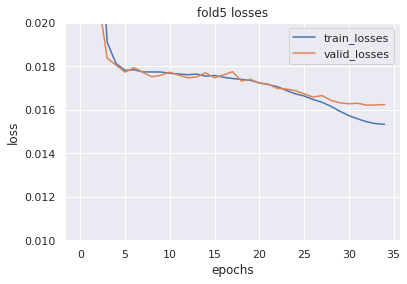

 
SEED : 1

==========FOLD1==========
nonscored-loop
-----EPOCH1-----
train_loss: 0.72649, train_metric: 0.72649
valid_loss: 0.70284, valid_metric: 0.70283
-----EPOCH2-----
train_loss: 0.69263, train_metric: 0.69263
valid_loss: 0.66815, valid_metric: 0.66811
-----EPOCH3-----
train_loss: 0.52570, train_metric: 0.52550
valid_loss: 0.23733, valid_metric: 0.23666
-----EPOCH4-----
train_loss: 0.06424, train_metric: 0.06247
valid_loss: 0.01196, valid_metric: 0.00918
-----EPOCH5-----
train_loss: 0.01106, train_metric: 0.00793
valid_loss: 0.01081, valid_metric: 0.00758
-----EPOCH6-----
train_loss: 0.01083, train_metric: 0.00758
valid_loss: 0.01087, valid_metric: 0.00775
-----EPOCH7-----
train_loss: 0.01076, train_metric: 0.00757
valid_loss: 0.01087, valid_metric: 0.00778
-----EPOCH8-----
train_loss: 0.01070, train_metric: 0.00754
valid_loss: 0.01075, valid_metric: 0.00758
-----EPOCH9-----
train_loss: 0.01070, train_metric: 0.00754
valid_loss: 0.01073, valid_metric: 0.00760
-----EPOCH10-----
tr

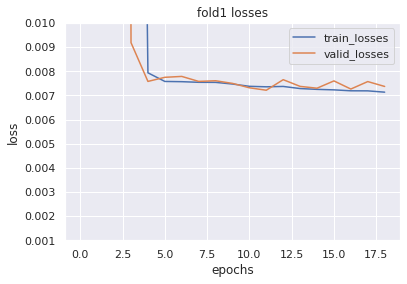

scored_loop
-----EPOCH1-----
train_loss: 0.61499, train_metric: 0.61488
valid_loss: 0.39034, valid_metric: 0.38995
-----EPOCH2-----
train_loss: 0.15583, train_metric: 0.15476
valid_loss: 0.04178, valid_metric: 0.04002
-----EPOCH3-----
train_loss: 0.02858, train_metric: 0.02639
valid_loss: 0.02302, valid_metric: 0.02051
-----EPOCH4-----
train_loss: 0.02176, train_metric: 0.01905
valid_loss: 0.02133, valid_metric: 0.01850
-----EPOCH5-----
train_loss: 0.02104, train_metric: 0.01811
valid_loss: 0.02075, valid_metric: 0.01779
-----EPOCH6-----
train_loss: 0.02079, train_metric: 0.01778
valid_loss: 0.02104, valid_metric: 0.01816
-----EPOCH7-----
train_loss: 0.02080, train_metric: 0.01776
valid_loss: 0.02076, valid_metric: 0.01761
-----EPOCH8-----
train_loss: 0.02082, train_metric: 0.01777
valid_loss: 0.02062, valid_metric: 0.01743
-----EPOCH9-----
train_loss: 0.02077, train_metric: 0.01773
valid_loss: 0.02075, valid_metric: 0.01767
-----EPOCH10-----
train_loss: 0.02076, train_metric: 0.01771


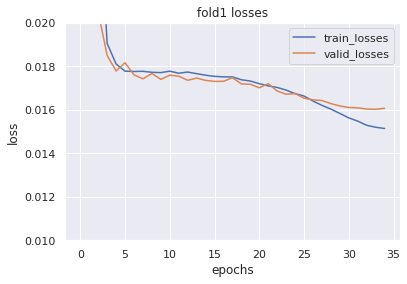

==========FOLD2==========
nonscored-loop
-----EPOCH1-----
train_loss: 0.72638, train_metric: 0.72638
valid_loss: 0.70288, valid_metric: 0.70288
-----EPOCH2-----
train_loss: 0.69254, train_metric: 0.69253
valid_loss: 0.67014, valid_metric: 0.67011
-----EPOCH3-----
train_loss: 0.52647, train_metric: 0.52627
valid_loss: 0.23704, valid_metric: 0.23637
-----EPOCH4-----
train_loss: 0.06476, train_metric: 0.06300
valid_loss: 0.01235, valid_metric: 0.00958
-----EPOCH5-----
train_loss: 0.01098, train_metric: 0.00785
valid_loss: 0.01112, valid_metric: 0.00787
-----EPOCH6-----
train_loss: 0.01069, train_metric: 0.00743
valid_loss: 0.01106, valid_metric: 0.00780
-----EPOCH7-----
train_loss: 0.01069, train_metric: 0.00750
valid_loss: 0.01113, valid_metric: 0.00801
-----EPOCH8-----
train_loss: 0.01063, train_metric: 0.00747
valid_loss: 0.01110, valid_metric: 0.00800
-----EPOCH9-----
train_loss: 0.01063, train_metric: 0.00746
valid_loss: 0.01115, valid_metric: 0.00808
-----EPOCH10-----
train_loss: 0.

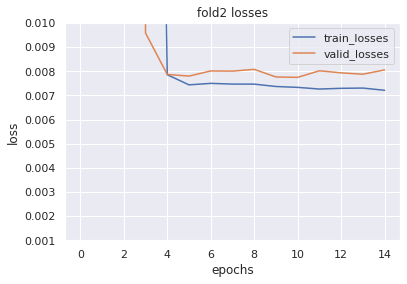

scored_loop
-----EPOCH1-----
train_loss: 0.62332, train_metric: 0.62322
valid_loss: 0.40369, valid_metric: 0.40332
-----EPOCH2-----
train_loss: 0.16624, train_metric: 0.16521
valid_loss: 0.04266, valid_metric: 0.04090
-----EPOCH3-----
train_loss: 0.02912, train_metric: 0.02692
valid_loss: 0.02510, valid_metric: 0.02262
-----EPOCH4-----
train_loss: 0.02192, train_metric: 0.01921
valid_loss: 0.02096, valid_metric: 0.01808
-----EPOCH5-----
train_loss: 0.02096, train_metric: 0.01801
valid_loss: 0.02065, valid_metric: 0.01757
-----EPOCH6-----
train_loss: 0.02067, train_metric: 0.01764
valid_loss: 0.02049, valid_metric: 0.01742
-----EPOCH7-----
train_loss: 0.02062, train_metric: 0.01757
valid_loss: 0.02051, valid_metric: 0.01744
-----EPOCH8-----
train_loss: 0.02065, train_metric: 0.01759
valid_loss: 0.02053, valid_metric: 0.01734
-----EPOCH9-----
train_loss: 0.02056, train_metric: 0.01750
valid_loss: 0.02049, valid_metric: 0.01749
-----EPOCH10-----
train_loss: 0.02056, train_metric: 0.01750


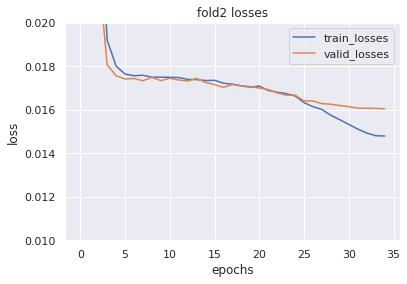

==========FOLD3==========
nonscored-loop
-----EPOCH1-----
train_loss: 0.72642, train_metric: 0.72642
valid_loss: 0.70218, valid_metric: 0.70217
-----EPOCH2-----
train_loss: 0.69272, train_metric: 0.69271
valid_loss: 0.67096, valid_metric: 0.67093
-----EPOCH3-----
train_loss: 0.52667, train_metric: 0.52647
valid_loss: 0.23650, valid_metric: 0.23583
-----EPOCH4-----
train_loss: 0.06483, train_metric: 0.06307
valid_loss: 0.01208, valid_metric: 0.00929
-----EPOCH5-----
train_loss: 0.01103, train_metric: 0.00790
valid_loss: 0.01094, valid_metric: 0.00767
-----EPOCH6-----
train_loss: 0.01076, train_metric: 0.00750
valid_loss: 0.01093, valid_metric: 0.00779
-----EPOCH7-----
train_loss: 0.01077, train_metric: 0.00757
valid_loss: 0.01098, valid_metric: 0.00789
-----EPOCH8-----
train_loss: 0.01068, train_metric: 0.00751
valid_loss: 0.01097, valid_metric: 0.00788
-----EPOCH9-----
train_loss: 0.01061, train_metric: 0.00745
valid_loss: 0.01098, valid_metric: 0.00788
-----EPOCH10-----
train_loss: 0.

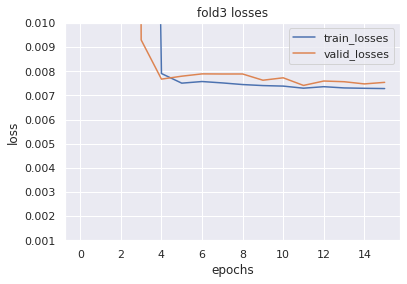

scored_loop
-----EPOCH1-----
train_loss: 0.61809, train_metric: 0.61798
valid_loss: 0.40624, valid_metric: 0.40586
-----EPOCH2-----
train_loss: 0.16081, train_metric: 0.15976
valid_loss: 0.05072, valid_metric: 0.04893
-----EPOCH3-----
train_loss: 0.02872, train_metric: 0.02652
valid_loss: 0.02380, valid_metric: 0.02128
-----EPOCH4-----
train_loss: 0.02187, train_metric: 0.01915
valid_loss: 0.02162, valid_metric: 0.01888
-----EPOCH5-----
train_loss: 0.02099, train_metric: 0.01805
valid_loss: 0.02060, valid_metric: 0.01756
-----EPOCH6-----
train_loss: 0.02081, train_metric: 0.01778
valid_loss: 0.02060, valid_metric: 0.01753
-----EPOCH7-----
train_loss: 0.02072, train_metric: 0.01768
valid_loss: 0.02129, valid_metric: 0.01793
-----EPOCH8-----
train_loss: 0.02073, train_metric: 0.01767
valid_loss: 0.02052, valid_metric: 0.01748
-----EPOCH9-----
train_loss: 0.02073, train_metric: 0.01768
valid_loss: 0.02055, valid_metric: 0.01745
-----EPOCH10-----
train_loss: 0.02061, train_metric: 0.01756


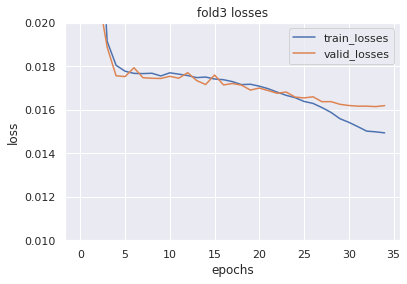

==========FOLD4==========
nonscored-loop
-----EPOCH1-----
train_loss: 0.72644, train_metric: 0.72644
valid_loss: 0.70311, valid_metric: 0.70311
-----EPOCH2-----
train_loss: 0.69270, train_metric: 0.69270
valid_loss: 0.66453, valid_metric: 0.66449
-----EPOCH3-----
train_loss: 0.52526, train_metric: 0.52505
valid_loss: 0.23803, valid_metric: 0.23737
-----EPOCH4-----
train_loss: 0.06406, train_metric: 0.06229
valid_loss: 0.01197, valid_metric: 0.00919
-----EPOCH5-----
train_loss: 0.01104, train_metric: 0.00791
valid_loss: 0.01077, valid_metric: 0.00754
-----EPOCH6-----
train_loss: 0.01083, train_metric: 0.00757
valid_loss: 0.01075, valid_metric: 0.00754
-----EPOCH7-----
train_loss: 0.01072, train_metric: 0.00752
valid_loss: 0.01074, valid_metric: 0.00756
-----EPOCH8-----
train_loss: 0.01068, train_metric: 0.00751
valid_loss: 0.01070, valid_metric: 0.00752
-----EPOCH9-----
train_loss: 0.01062, train_metric: 0.00746
valid_loss: 0.01070, valid_metric: 0.00756
-----EPOCH10-----
train_loss: 0.

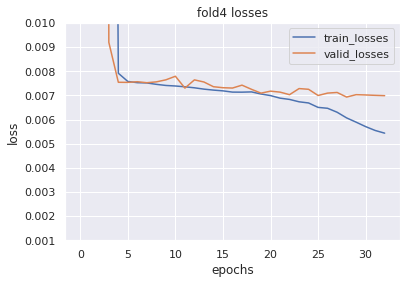

scored_loop
-----EPOCH1-----
train_loss: 0.59624, train_metric: 0.59612
valid_loss: 0.35086, valid_metric: 0.35041
-----EPOCH2-----
train_loss: 0.13748, train_metric: 0.13634
valid_loss: 0.03898, valid_metric: 0.03717
-----EPOCH3-----
train_loss: 0.02813, train_metric: 0.02593
valid_loss: 0.02297, valid_metric: 0.02046
-----EPOCH4-----
train_loss: 0.02204, train_metric: 0.01935
valid_loss: 0.02120, valid_metric: 0.01832
-----EPOCH5-----
train_loss: 0.02109, train_metric: 0.01819
valid_loss: 0.02090, valid_metric: 0.01800
-----EPOCH6-----
train_loss: 0.02082, train_metric: 0.01783
valid_loss: 0.02069, valid_metric: 0.01767
-----EPOCH7-----
train_loss: 0.02090, train_metric: 0.01787
valid_loss: 0.02070, valid_metric: 0.01761
-----EPOCH8-----
train_loss: 0.02081, train_metric: 0.01777
valid_loss: 0.02053, valid_metric: 0.01743
-----EPOCH9-----
train_loss: 0.02084, train_metric: 0.01780
valid_loss: 0.02096, valid_metric: 0.01792
-----EPOCH10-----
train_loss: 0.02095, train_metric: 0.01790


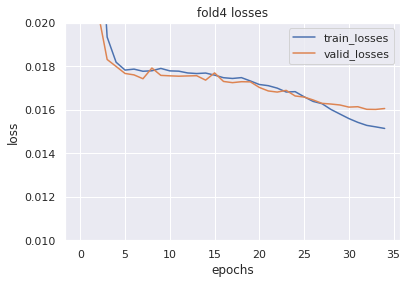

==========FOLD5==========
nonscored-loop
-----EPOCH1-----
train_loss: 0.72648, train_metric: 0.72648
valid_loss: 0.70275, valid_metric: 0.70275
-----EPOCH2-----
train_loss: 0.69257, train_metric: 0.69256
valid_loss: 0.66887, valid_metric: 0.66884
-----EPOCH3-----
train_loss: 0.52546, train_metric: 0.52525
valid_loss: 0.23671, valid_metric: 0.23604
-----EPOCH4-----
train_loss: 0.06430, train_metric: 0.06253
valid_loss: 0.01186, valid_metric: 0.00907
-----EPOCH5-----
train_loss: 0.01109, train_metric: 0.00796
valid_loss: 0.01070, valid_metric: 0.00744
-----EPOCH6-----
train_loss: 0.01081, train_metric: 0.00755
valid_loss: 0.01077, valid_metric: 0.00762
-----EPOCH7-----
train_loss: 0.01076, train_metric: 0.00757
valid_loss: 0.01072, valid_metric: 0.00759
-----EPOCH8-----
train_loss: 0.01074, train_metric: 0.00757
valid_loss: 0.01066, valid_metric: 0.00749
-----EPOCH9-----
train_loss: 0.01070, train_metric: 0.00754
valid_loss: 0.01062, valid_metric: 0.00738
-----EPOCH10-----
train_loss: 0.

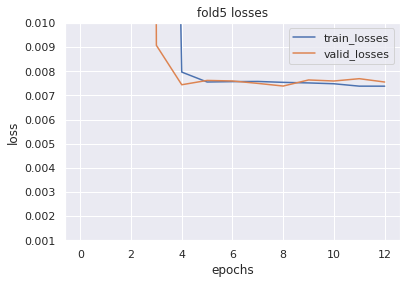

scored_loop
-----EPOCH1-----
train_loss: 0.63455, train_metric: 0.63446
valid_loss: 0.42114, valid_metric: 0.42080
-----EPOCH2-----
train_loss: 0.17054, train_metric: 0.16952
valid_loss: 0.04251, valid_metric: 0.04076
-----EPOCH3-----
train_loss: 0.02894, train_metric: 0.02674
valid_loss: 0.02351, valid_metric: 0.02101
-----EPOCH4-----
train_loss: 0.02194, train_metric: 0.01921
valid_loss: 0.02117, valid_metric: 0.01829
-----EPOCH5-----
train_loss: 0.02109, train_metric: 0.01814
valid_loss: 0.02118, valid_metric: 0.01822
-----EPOCH6-----
train_loss: 0.02076, train_metric: 0.01773
valid_loss: 0.02097, valid_metric: 0.01792
-----EPOCH7-----
train_loss: 0.02081, train_metric: 0.01775
valid_loss: 0.02111, valid_metric: 0.01812
-----EPOCH8-----
train_loss: 0.02076, train_metric: 0.01770
valid_loss: 0.02061, valid_metric: 0.01756
-----EPOCH9-----
train_loss: 0.02081, train_metric: 0.01776
valid_loss: 0.02101, valid_metric: 0.01794
-----EPOCH10-----
train_loss: 0.02088, train_metric: 0.01783


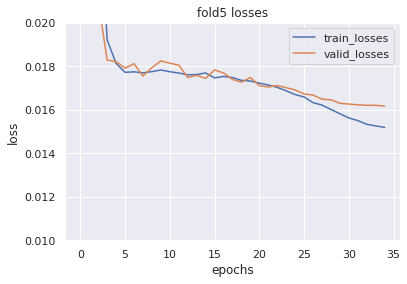

In [42]:
# Averaging on multiple SEEDS

SEED = [0, 1]
oof = np.zeros((len(train), len(target_cols)))
predictions = np.zeros((len(test), len(target_cols)))
CVs = list()

print(f'used device: {DEVICE}')

for seed in SEED:
    
    print(f' ')
    print(f'SEED : {seed}')
    print(f'')
    
    oof_, predictions_, CVs_ = run_k_fold(NFOLDS, seed, EPOCHS, LEARNING_RATE)
    oof += oof_ / len(SEED)
    predictions += predictions_ / len(SEED)
    CVs += CVs_
    
train[target_cols] = oof
test[target_cols] = predictions

In [43]:
valid_results = train_targets_scored.drop(columns=target_cols).merge(
    train[['sig_id']+target_cols], on='sig_id', how='left').fillna(0)

y_true = train_targets_scored[target_cols].values
y_pred = valid_results[target_cols].values

cv = 0
for i in range(len(target_cols)):
    cv_ = log_loss(y_true[:, i], y_pred[:, i])
    cv += cv_ / len(target_cols)
    
auc = 0
for i in range(len(target_cols)):
    auc_ = roc_auc_score(y_true[:, i], y_pred[:, i])
    auc += auc_ / len(target_cols)
    
print(f'CV log_loss: {cv:.6f} +/- {np.std(CVs):.6f}')
print(f'AUC: {auc:.6f}')

CV log_loss: 0.014879 +/- 0.000162
AUC: 0.807891


In [44]:
file_path = 'oof_ResNet.npy'
np.save(file_path, y_pred)

submission_ResNet2 = sample_submission.drop(columns=target_cols).merge(
    test[['sig_id']+target_cols], on='sig_id', how='left').fillna(0).iloc[:, 1:]
# sub.to_csv('submission.csv', index=False)

In [45]:
submission_ResNet = submission_ResNet1 * 0.8 + submission_ResNet2 * 0.2

## Model TabNet

In [46]:
DEVICE = ('cuda' if torch.cuda.is_available() else 'cpu')
EPOCHS = 35
BATCH_SIZE = 64
LEARNING_RATE = 1e-3
WEIGHT_DECAY = 5e-6
NFOLDS = 5
EARLY_STOPPING_STEPS = 10
EARLY_STOP = False
smoothing = 1e-6
p_min = smoothing
p_max = 1 - smoothing

num_features = len(feature_cols)
num_targets = len(target_cols)
hidden_size_1 = 1024
hidden_size_2 = 1024

In [47]:
MAX_EPOCH = 200
# n_d and n_a are different from the original work, 32 instead of 24
# This is the first change in the code from the original
tabnet_params = dict(
    n_d = 32,
    n_a = 32,
    n_steps = 1,
    gamma = 1.3,
    lambda_sparse = 0,
    optimizer_fn = optim.Adam,
    optimizer_params = dict(lr = 2e-2, weight_decay = 1e-5),
    mask_type = "entmax",
    scheduler_params = dict(
        mode = "min", patience = 5, min_lr = 1e-5, factor = 0.9),
    scheduler_fn = optim.lr_scheduler.ReduceLROnPlateau,
    seed = seed,
    verbose = 1
)

In [48]:
scores_auc_all = []
test_cv_preds = []

# mskf = MultilabelStratifiedKFold(n_splits = NB_SPLITS, random_state = 0, shuffle = True)

oof_preds = []
oof_targets = []
scores = []
scores_auc = []

oof = np.zeros((len(train), target.iloc[:, 1:].shape[1]))

SEED = [0]

for seed in SEED:
    
    print(f'SEED: {seed}')
    
    oof_tmp = np.zeros((len(train), target.iloc[:, 1:].shape[1]))
#     predictions_tmp = np.zeros((len(test_), target.iloc[:, 1:].shape[1]))
    
    for fold in range(NFOLDS):
        print("FOLDS: ", fold + 1)
        print('*' * 60)

    #     X_train, y_train = train_df[feature_cols].values[train_idx, :], target[target_cols].values[train_idx, :]
    #     X_val, y_val = train_df[feature_cols].values[val_idx, :], target[target_cols].values[val_idx, :]
    #     X_test = test_df[feature_cols].values

        train_ = pd.get_dummies(folds, columns=['cp_time', 'cp_dose'])
        test_ = pd.get_dummies(test, columns=['cp_time', 'cp_dose'])

        trn_idx = train_[train_['kfold'] != fold].index
        val_idx = train_[train_['kfold'] == fold].index

        train_df = train_[train_['kfold'] != fold].reset_index()
        valid_df = train_[train_['kfold'] == fold].reset_index()
    
        x_train, y_train = train_df[feature_cols].values, train_df[target_cols].values
        x_valid, y_valid = valid_df[feature_cols].values, valid_df[target_cols].values

        x_test = test_[feature_cols].values

        ### Model ###
        model = TabNetRegressor(**tabnet_params)

        ### Fit ###
        # Another change to the original code
        # virtual_batch_size of 32 instead of 128
        model.fit(
            X_train = x_train,
            y_train = y_train,
            eval_set = [(x_valid, y_valid)],
            eval_name = ["val"],
            eval_metric = ["logits_ll"],
            max_epochs = MAX_EPOCH,
            patience = 20,
            batch_size = 1024, 
            virtual_batch_size = 32,
            num_workers = 1,
            drop_last = False,
#             from_unsupervised=pretrainer,
            # To use binary cross entropy because this is not a regression problem
            loss_fn = SmoothBCEwLogits(smoothing=smoothing)
        )
        print('-' * 60)

        ### Predict on validation ###
        preds_val = model.predict(x_valid)
        # Apply sigmoid to the predictions
        preds = 1 / (1 + np.exp(-preds_val))
        preds = np.clip(preds, p_min, p_max)
        oof_tmp[val_idx] += preds
        score = np.min(model.history["val_logits_ll"])

        ### Save OOF for CV ###
        oof_preds.append(preds)
        oof_targets.append(y_valid)
        scores.append(score)

        ### Predict on test ###
        preds_test = model.predict(x_test)
        preds_test = 1 / (1 + np.exp(-preds_test))
        preds_test = np.clip(preds_test, p_min, p_max)
#         predictions_tmp += preds_test / NFOLDS
        test_cv_preds.append(preds_test)

#         name = f'TabNet_FOLD{fold+1}_SEED{seed}'
#         model.save_model(name)
    
    oof += oof_tmp / len(SEED)

train[target_cols] = oof
test_preds_all = np.stack(test_cv_preds)

SEED: 0
FOLDS:  1
************************************************************
Device used : cuda
epoch 0  | loss: 0.34046 | val_logits_ll: 0.03664 |  0:00:02s
epoch 1  | loss: 0.02897 | val_logits_ll: 0.02765 |  0:00:04s
epoch 2  | loss: 0.02398 | val_logits_ll: 0.02205 |  0:00:06s
epoch 3  | loss: 0.02175 | val_logits_ll: 0.02117 |  0:00:07s
epoch 4  | loss: 0.02111 | val_logits_ll: 0.02081 |  0:00:09s
epoch 5  | loss: 0.02074 | val_logits_ll: 0.02049 |  0:00:11s
epoch 6  | loss: 0.02048 | val_logits_ll: 0.02013 |  0:00:12s
epoch 7  | loss: 0.02013 | val_logits_ll: 0.01983 |  0:00:14s
epoch 8  | loss: 0.01982 | val_logits_ll: 0.01951 |  0:00:16s
epoch 9  | loss: 0.01947 | val_logits_ll: 0.02042 |  0:00:18s
epoch 10 | loss: 0.01905 | val_logits_ll: 0.01869 |  0:00:19s
epoch 11 | loss: 0.01872 | val_logits_ll: 0.01838 |  0:00:21s
epoch 12 | loss: 0.01856 | val_logits_ll: 0.0182  |  0:00:23s
epoch 13 | loss: 0.0182  | val_logits_ll: 0.01802 |  0:00:25s
epoch 14 | loss: 0.01814 | val_log

In [49]:
valid_results = train_targets_scored.drop(columns=target_cols).merge(
    train[['sig_id']+target_cols], on='sig_id', how='left').fillna(0)

y_true = train_targets_scored[target_cols].values
y_pred = valid_results[target_cols].values

cv = 0
for i in range(len(target_cols)):
    cv_ = log_loss(y_true[:, i], y_pred[:, i])
    cv += cv_ / len(target_cols)
    
auc = 0
for i in range(len(target_cols)):
    auc_ = roc_auc_score(y_true[:, i], y_pred[:, i])
    auc += auc_ / len(target_cols)
    
print(f'CV log_loss: {cv:.6f}')
print(f'AUC: {auc:.6f}')

CV log_loss: 0.015336
AUC: 0.769598


In [50]:
file_path = 'oof_TabNet.npy'
np.save(file_path, y_pred)

all_feat = [col for col in sample_submission.columns if col not in ["sig_id"]]
# To obtain the same length of test_preds_all and submission
data_path = "../input/lish-moa/"
test = pd.read_csv(data_path + "test_features.csv")
sig_id = test[test["cp_type"] != "ctl_vehicle"].sig_id.reset_index(drop = True)
tmp = pd.DataFrame(test_preds_all.mean(axis = 0), columns = all_feat)
tmp["sig_id"] = sig_id

submission_TabNet2 = pd.merge(test[["sig_id"]], tmp, on = "sig_id", how = "left")
submission_TabNet2.fillna(0, inplace = True)

submission_TabNet2 = submission_TabNet2.iloc[:, 1:]

#submission[all_feat] = tmp.mean(axis = 0)

# Set control to 0
#submission.loc[test["cp_type"] == 0, submission.columns[1:]] = 0
# submission.to_csv("submission.csv", index = None)
# submission.head()

In [51]:
submission_TabNet = submission_TabNet1 * 0.8 + submission_TabNet2 * 0.2

## Model Simple Deep

In [52]:
def preprocessor(train_features, test_features):
    
    print('preprocess start')
    
#     # drop_ctl_vehicle
#     train_features, test_features, target = drop_ctl_vehicle(train_features, test_features)
    
    # rank_gauss
    train_features, test_features = rank_gauss(train_features, test_features)
    print('rank_gauss: done')
    print('train_features.shape', train_features.shape)
    print('test_features.shape', test_features.shape)
    
    # stats
    train_features, test_features = get_stats(train_features, test_features)
    print('get_stats: done')
    print('train_features.shape', train_features.shape)
    print('test_features.shape', test_features.shape)
    
    # pca
    train_features, test_features = get_pca(train_features, test_features, n_gs=600, n_cs=50) 
    print('get_pca: done')
    print('train_features.shape', train_features.shape)
    print('test_features.shape', test_features.shape)
    
    # var_thresh
    train_features, test_features = var_thresh(threshold=0.8, train_features=train_features, test_features=test_features)
    print('var_thresh: done')
    print('train_features.shape', train_features.shape)
    print('test_features.shape', test_features.shape)
    
#     # clustering
#     train_features, test_features = get_cluster(train_features, test_features, n_clusters_g=35, n_clusters_c=5, SEED=0)
#     print('clustering: done')
#     print('train_features.shape', train_features.shape)
#     print('test_features.shape', test_features.shape)
    
#     # Scaling
#     train_features, test_features = scaling(train_features, test_features)
#     print('scaling: done')
    
    # data merge
    train = train_features.merge(train_targets_scored, on='sig_id').merge(train_targets_nonscored, on ='sig_id')
    train = train[train['cp_type'] != 'ctl_vehicle'].reset_index(drop=True)
    test = test_features[test_features['cp_type'] != 'ctl_vehicle'].reset_index(drop=True)

    target = train[train_targets_scored.columns]
    target_nonscored = train[train_targets_nonscored.columns]
    
    train = train.drop('cp_type', axis=1)
    test = test.drop('cp_type', axis=1)
    
    return train, target, test, target_nonscored  

train, target, test, target_nonscored = preprocessor(train_features, test_features)

preprocess start
rank_gauss: done
train_features.shape (23814, 876)
test_features.shape (3982, 876)
get_stats: done
train_features.shape (23814, 888)
test_features.shape (3982, 888)
get_pca: done
train_features.shape (23814, 1538)
test_features.shape (3982, 1538)
var_thresh: done
train_features.shape (23814, 1043)
test_features.shape (3982, 1043)


In [53]:
folds = make_folds_old(train, n_splits=5)

In [54]:
target_cols = target.drop('sig_id', axis=1).columns.values.tolist()
target_nonscored_cols = target_nonscored.drop('sig_id', axis=1).columns.values.tolist()
feature_cols = [c for c in pd.get_dummies(train, columns=['cp_time', 'cp_dose']).columns if (c not in target_cols) & (c not in target_nonscored_cols)]
feature_cols = [c for c in feature_cols if c not in ['kfold', 'sig_id']]
all_target_cols = target_cols + target_nonscored_cols

num_features = len(feature_cols)
num_targets = len(target_cols)
num_targets_nonscored = len(target_nonscored_cols)
num_all_targets = len(all_target_cols)

print(f'num_features: {num_features}')
print(f'num_targets: {num_targets}')
print(f'num_targets_nonscored: {num_targets_nonscored}')
print(f'num_all_targets: {num_all_targets}')

num_features: 1044
num_targets: 206
num_targets_nonscored: 402
num_all_targets: 608


In [55]:
print(f'train.shape: {train.shape}')
print(f'folds.shape: {folds.shape}')
print(f'test.shape: {test.shape}')
print(f'target.shape: {target.shape}')
print(f'target_nonscored.shape: {target_nonscored.shape}')
print(f'sample_submission.shape: {sample_submission.shape}')

train.shape: (21948, 1650)
folds.shape: (21948, 1651)
test.shape: (3624, 1042)
target.shape: (21948, 207)
target_nonscored.shape: (21948, 403)
sample_submission.shape: (3982, 207)


In [56]:
def train_fn(model, optimizer, scheduler, loss_tr, loss_fn, dataloader, device):
    rejected = 0
    model.train()
    final_loss = 0
    final_metric = 0
    
    for data in dataloader:
        optimizer.zero_grad()
        inputs, targets = data['x'].to(device), data['y'].to(device)
        if len(inputs) > 1:
            outputs = model(inputs)
            loss = loss_tr(outputs, targets)
            metric = loss_fn(outputs, targets)
            loss.backward()
            optimizer.step()
            scheduler.step()

            final_loss += loss.item()
            final_metric += metric.item()
        
        else:
            print('rejected')
            rejected += len(inputs)
            
        
    final_loss /= (len(dataloader) - rejected)
    final_metric /= (len(dataloader) - rejected)
    
    return final_loss, final_metric

In [57]:
def valid_fn(model, loss_tr, loss_fn, dataloader, device):
    model.eval()
    final_loss = 0
    final_metric = 0
    valid_preds = []
    
    for data in dataloader:
        
        inputs, targets = data['x'].to(device), data['y'].to(device)
        outputs = model(inputs)
        loss = loss_tr(outputs, targets)
        metric = loss_fn(outputs, targets)
        final_loss += loss.item()
        final_metric += metric.item()
        outputs = torch.clamp(torch.sigmoid(outputs).detach().cpu(), p_min, p_max)
        valid_preds.append(outputs.numpy())
        
    final_loss /= len(dataloader)
    final_metric /= len(dataloader)
    valid_preds = np.concatenate(valid_preds)
        
    return final_loss, final_metric, valid_preds

In [58]:
def inference_fn(model, dataloader, device):
    model.eval()
    preds = []
    
    for data in dataloader:
        inputs = data['x'].to(device)
        
        with torch.no_grad():
            outputs = model(inputs)
            
        outputs = torch.clamp(torch.sigmoid(outputs).detach().cpu(), p_min, p_max)    
        preds.append(outputs.numpy())
        
    preds = np.concatenate(preds)
        
    return preds

In [59]:
DEVICE = ('cuda' if torch.cuda.is_available() else 'cpu')
EPOCHS = 24
BATCH_SIZE = 128
LEARNING_RATE = 1e-3
NFOLDS = 5

smoothing = 0.001
p_min = smoothing
p_max = 1 - smoothing

WEIGHT_DECAY = {'ALL_TARGETS': 1e-5, 'SCORED_ONLY': 3e-6}
MAX_LR = {'ALL_TARGETS': 1e-2, 'SCORED_ONLY': 3e-3}
DIV_FACTOR = {'ALL_TARGETS': 1e3, 'SCORED_ONLY': 1e2}
PCT_START = 0.1

In [60]:
def run_training(fold, seed, EPOCHS, LEARNING_RATE):
    
    print(f'==========FOLD{fold+1}==========')
    
    
    seed_everything(seed)
    
    train_losses = list()
    valid_losses = list()
    CV = list()
    
    train = pd.get_dummies(folds, columns=['cp_time', 'cp_dose'])
    test_ = pd.get_dummies(test, columns=['cp_time', 'cp_dose'])
    
    trn_idx = train[train['kfold'] != fold].index
    val_idx = train[train['kfold'] == fold].index
    
    train_df = train[train['kfold'] != fold].reset_index()
    valid_df = train[train['kfold'] == fold].reset_index()
    
    def train_model(model, tag_name, target_cols_now, fine_tune_scheduler=None):
        
        print(f'=={tag_name}==')
        
        train_losses = list()
        valid_losses = list()
        
        x_train, y_train  = train_df[feature_cols].values, train_df[target_cols_now].values
        x_valid, y_valid =  valid_df[feature_cols].values, valid_df[target_cols_now].values
        
        train_dataset = MoADataset(x_train, y_train)
        valid_dataset = MoADataset(x_valid, y_valid)

        trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
        validloader = torch.utils.data.DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)
        
        optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY[tag_name])
        scheduler = optim.lr_scheduler.OneCycleLR(optimizer=optimizer,
                                                  steps_per_epoch=len(trainloader),
                                                  pct_start=PCT_START,
                                                  div_factor=DIV_FACTOR[tag_name], 
                                                  max_lr=MAX_LR[tag_name],
                                                  epochs=EPOCHS)
        
        loss_fn = nn.BCEWithLogitsLoss()
        loss_tr = SmoothBCEwLogits(smoothing=smoothing)

        oof = np.zeros((len(train), len(target_cols_now)))
        best_loss = np.inf

        for epoch in range(EPOCHS):
        
            if fine_tune_scheduler is not None:
                fine_tune_scheduler.step(epoch, model)
        
            print(f'-----EPOCH{epoch+1}-----')

            train_loss, train_metric = train_fn(model, optimizer, scheduler, loss_tr, loss_fn, trainloader, DEVICE)
            print(f'train_loss: {train_loss:.5f}, train_metric: {train_metric:.5f}')
            train_losses.append(train_loss)
            valid_loss, valid_metric, valid_preds = valid_fn(model, loss_tr, loss_fn, validloader, DEVICE)
            print(f'valid_loss: {valid_loss:.5f}, valid_metric: {valid_metric:.5f}')
            valid_losses.append(valid_loss)

            if valid_loss < best_loss:

                best_loss = valid_loss
                oof[val_idx] = valid_preds
                torch.save(model.state_dict(), f'Simple_Deep_FOLD{fold+1}_SEED{seed}.pth')

        plt.plot(train_losses, label='train_losses')
        plt.plot(valid_losses, label='valid_losses')
        plt.xlabel('epochs')
        plt.ylabel('loss')
        if tag_name == 'ALL_TARGETS':
            plt.ylim([6e-3, 1.5e-2])
        else:
            plt.ylim([1e-2, 2e-2])
        plt.title(f'fold{fold+1} losses')
        plt.show()

        return oof
    
    fine_tune_scheduler = FineTuneScheduler(EPOCHS)
    
    pretrained_model = Model_Simple_Deep(num_features, num_all_targets)
    pretrained_model.to(DEVICE)
    
    # Train on scored + nonscored targets
    train_model(pretrained_model, 'ALL_TARGETS', all_target_cols)
    
    # Load the pretrained model with the best loss
    pretrained_model = Model_Simple_Deep(num_features, num_all_targets)
    pretrained_model.load_state_dict(torch.load(f'Simple_Deep_FOLD{fold+1}_SEED{seed}.pth'))
    pretrained_model.to(DEVICE)
    
    # Copy model without the top layer)
    final_model = fine_tune_scheduler.copy_without_top(pretrained_model, num_features, num_all_targets, num_targets)
    
    # Fine-ture the model on scored targets only
    oof = train_model(final_model, 'SCORED_ONLY', target_cols, fine_tune_scheduler)
    
    #-----------------------PREDICTION-------------------------
                
    x_test = test_[feature_cols].values
    testdataset = TestDataset(x_test)
    testloader = torch.utils.data.DataLoader(testdataset, batch_size=BATCH_SIZE, shuffle=False)
    
    # Load the fine tuned model with the best loss
    model = Model_Simple_Deep(num_features, num_targets)
    model.load_state_dict(torch.load(f'Simple_Deep_FOLD{fold+1}_SEED{seed}.pth'))
    model.to(DEVICE)
    
    predictions = np.zeros((len(test_), target.iloc[:, 1:].shape[1]))
    predictions = inference_fn(model, testloader, DEVICE)
    
    return oof, predictions

In [61]:
def run_k_fold(NFOLD, seed, EPOCH, LEARNING_RATE):
    oof = np.zeros((len(train), len(target_cols)))
    predictions = np.zeros((len(test), len(target_cols)))
    
    for fold in range(NFOLDS):
        oof_, pred_ = run_training(fold, seed, EPOCH, LEARNING_RATE)
        
        predictions += pred_ / NFOLDS
        oof += oof_
        
    return oof, predictions

device used: cuda
 
SEED : 0

==========FOLD1==========
==ALL_TARGETS==
-----EPOCH1-----
train_loss: 0.51012, train_metric: 0.50970
valid_loss: 0.02825, valid_metric: 0.02616
-----EPOCH2-----
train_loss: 0.01602, train_metric: 0.01317
valid_loss: 0.01451, valid_metric: 0.01135
-----EPOCH3-----
train_loss: 0.01351, train_metric: 0.01027
valid_loss: 0.01366, valid_metric: 0.01043
-----EPOCH4-----
train_loss: 0.01300, train_metric: 0.00970
valid_loss: 0.01280, valid_metric: 0.00955
-----EPOCH5-----
train_loss: 0.01289, train_metric: 0.00959
valid_loss: 0.01309, valid_metric: 0.00968
-----EPOCH6-----
train_loss: 0.01309, train_metric: 0.00974
valid_loss: 0.01295, valid_metric: 0.00968
-----EPOCH7-----
train_loss: 0.01286, train_metric: 0.00958
valid_loss: 0.01273, valid_metric: 0.00948
-----EPOCH8-----
train_loss: 0.01285, train_metric: 0.00960
valid_loss: 0.01290, valid_metric: 0.00968
-----EPOCH9-----
train_loss: 0.01289, train_metric: 0.00964
valid_loss: 0.01275, valid_metric: 0.00951
-

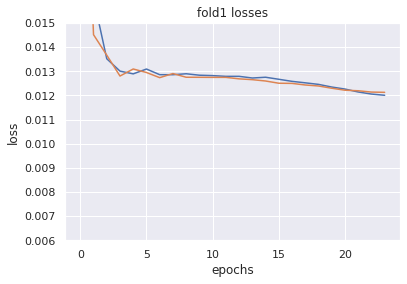

==SCORED_ONLY==
-----EPOCH1-----
train_loss: 0.65513, train_metric: 0.65506
valid_loss: 0.31008, valid_metric: 0.30956
-----EPOCH2-----
train_loss: 0.06735, train_metric: 0.06557
valid_loss: 0.02247, valid_metric: 0.02000
-----EPOCH3-----
train_loss: 0.02121, train_metric: 0.01850
valid_loss: 0.02024, valid_metric: 0.01736
-----EPOCH4-----
train_loss: 0.02010, train_metric: 0.01712
valid_loss: 0.01983, valid_metric: 0.01678
-----EPOCH5-----
train_loss: 0.02198, train_metric: 0.01884
valid_loss: 0.01999, valid_metric: 0.01660
-----EPOCH6-----
train_loss: 0.01985, train_metric: 0.01665
valid_loss: 0.01978, valid_metric: 0.01655
-----EPOCH7-----
train_loss: 0.01965, train_metric: 0.01643
valid_loss: 0.01976, valid_metric: 0.01651
-----EPOCH8-----
train_loss: 0.01957, train_metric: 0.01634
valid_loss: 0.01976, valid_metric: 0.01652
-----EPOCH9-----
train_loss: 0.01978, train_metric: 0.01655
valid_loss: 0.01982, valid_metric: 0.01650
-----EPOCH10-----
train_loss: 0.01962, train_metric: 0.01

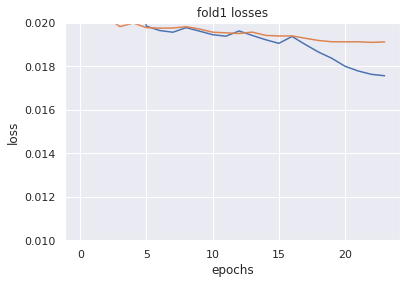

==========FOLD2==========
==ALL_TARGETS==
-----EPOCH1-----
train_loss: 0.51038, train_metric: 0.50995
valid_loss: 0.02356, valid_metric: 0.02139
-----EPOCH2-----
train_loss: 0.01585, train_metric: 0.01301
valid_loss: 0.01490, valid_metric: 0.01179
-----EPOCH3-----
train_loss: 0.01335, train_metric: 0.01014
valid_loss: 0.01364, valid_metric: 0.01047
-----EPOCH4-----
train_loss: 0.01303, train_metric: 0.00975
valid_loss: 0.01446, valid_metric: 0.01117
-----EPOCH5-----
train_loss: 0.01349, train_metric: 0.01010
valid_loss: 0.01339, valid_metric: 0.00957
-----EPOCH6-----
train_loss: 0.01299, train_metric: 0.00963
valid_loss: 0.01285, valid_metric: 0.00955
-----EPOCH7-----
train_loss: 0.01287, train_metric: 0.00960
valid_loss: 0.01305, valid_metric: 0.00978
-----EPOCH8-----
train_loss: 0.01285, train_metric: 0.00960
valid_loss: 0.01281, valid_metric: 0.00961
-----EPOCH9-----
train_loss: 0.01281, train_metric: 0.00956
valid_loss: 0.01269, valid_metric: 0.00942
-----EPOCH10-----
train_loss: 0

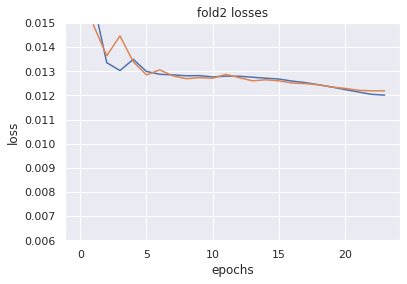

==SCORED_ONLY==
-----EPOCH1-----
train_loss: 0.65294, train_metric: 0.65287
valid_loss: 0.30739, valid_metric: 0.30687
-----EPOCH2-----
train_loss: 0.06699, train_metric: 0.06521
valid_loss: 0.02251, valid_metric: 0.02004
-----EPOCH3-----
train_loss: 0.02116, train_metric: 0.01844
valid_loss: 0.02029, valid_metric: 0.01741
-----EPOCH4-----
train_loss: 0.02007, train_metric: 0.01709
valid_loss: 0.01996, valid_metric: 0.01695
-----EPOCH5-----
train_loss: 0.02511, train_metric: 0.02204
valid_loss: 0.02011, valid_metric: 0.01696
-----EPOCH6-----
train_loss: 0.01973, train_metric: 0.01655
valid_loss: 0.01996, valid_metric: 0.01669
-----EPOCH7-----
train_loss: 0.01961, train_metric: 0.01639
valid_loss: 0.01987, valid_metric: 0.01658
-----EPOCH8-----
train_loss: 0.01953, train_metric: 0.01630
valid_loss: 0.01987, valid_metric: 0.01658
-----EPOCH9-----
train_loss: 0.01976, train_metric: 0.01652
valid_loss: 0.01986, valid_metric: 0.01657
-----EPOCH10-----
train_loss: 0.01950, train_metric: 0.01

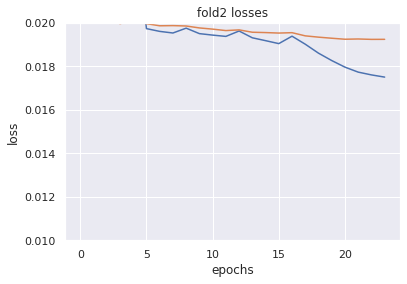

==========FOLD3==========
==ALL_TARGETS==
-----EPOCH1-----
train_loss: 0.50981, train_metric: 0.50938
valid_loss: 0.02604, valid_metric: 0.02394
-----EPOCH2-----
train_loss: 0.01640, train_metric: 0.01353
valid_loss: 0.01368, valid_metric: 0.01050
-----EPOCH3-----
train_loss: 0.01362, train_metric: 0.01034
valid_loss: 0.01299, valid_metric: 0.00968
-----EPOCH4-----
train_loss: 0.01307, train_metric: 0.00972
valid_loss: 0.01264, valid_metric: 0.00938
-----EPOCH5-----
train_loss: 0.01290, train_metric: 0.00959
valid_loss: 0.01269, valid_metric: 0.00938
-----EPOCH6-----
train_loss: 0.01295, train_metric: 0.00966
valid_loss: 0.01277, valid_metric: 0.00950
-----EPOCH7-----
train_loss: 0.01293, train_metric: 0.00965
valid_loss: 0.01390, valid_metric: 0.01063
-----EPOCH8-----
train_loss: 0.01294, train_metric: 0.00968
valid_loss: 0.01280, valid_metric: 0.00956
-----EPOCH9-----
train_loss: 0.01292, train_metric: 0.00967
valid_loss: 0.01276, valid_metric: 0.00947
-----EPOCH10-----
train_loss: 0

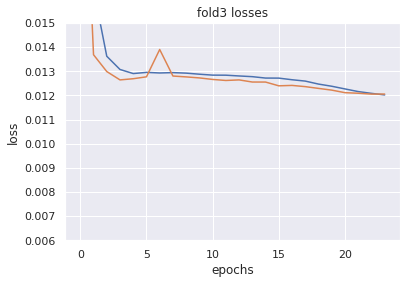

==SCORED_ONLY==
-----EPOCH1-----
train_loss: 0.65386, train_metric: 0.65379
valid_loss: 0.30480, valid_metric: 0.30427
-----EPOCH2-----
train_loss: 0.06643, train_metric: 0.06465
valid_loss: 0.02259, valid_metric: 0.02012
-----EPOCH3-----
train_loss: 0.02109, train_metric: 0.01837
valid_loss: 0.02034, valid_metric: 0.01747
-----EPOCH4-----
train_loss: 0.02002, train_metric: 0.01704
valid_loss: 0.02001, valid_metric: 0.01697
-----EPOCH5-----
train_loss: 0.02242, train_metric: 0.01922
valid_loss: 0.02024, valid_metric: 0.01691
-----EPOCH6-----
train_loss: 0.01975, train_metric: 0.01653
valid_loss: 0.01996, valid_metric: 0.01669
-----EPOCH7-----
train_loss: 0.01963, train_metric: 0.01640
valid_loss: 0.01990, valid_metric: 0.01662
-----EPOCH8-----
train_loss: 0.01952, train_metric: 0.01629
valid_loss: 0.02005, valid_metric: 0.01678
-----EPOCH9-----
train_loss: 0.01977, train_metric: 0.01653
valid_loss: 0.01994, valid_metric: 0.01659
-----EPOCH10-----
train_loss: 0.01956, train_metric: 0.01

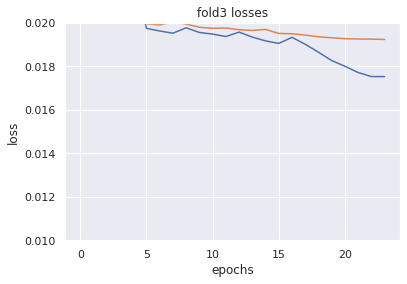

==========FOLD4==========
==ALL_TARGETS==
-----EPOCH1-----
train_loss: 0.50780, train_metric: 0.50737
valid_loss: 0.02447, valid_metric: 0.02230
-----EPOCH2-----
train_loss: 0.01576, train_metric: 0.01294
valid_loss: 0.01370, valid_metric: 0.01062
-----EPOCH3-----
train_loss: 0.01342, train_metric: 0.01019
valid_loss: 0.01385, valid_metric: 0.01060
-----EPOCH4-----
train_loss: 0.01310, train_metric: 0.00980
valid_loss: 0.01389, valid_metric: 0.01045
-----EPOCH5-----
train_loss: 0.01350, train_metric: 0.01011
valid_loss: 0.01390, valid_metric: 0.01040
-----EPOCH6-----
train_loss: 0.01301, train_metric: 0.00966
valid_loss: 0.01291, valid_metric: 0.00965
-----EPOCH7-----
train_loss: 0.01291, train_metric: 0.00963
valid_loss: 0.01307, valid_metric: 0.00978
-----EPOCH8-----
train_loss: 0.01288, train_metric: 0.00962
valid_loss: 0.01275, valid_metric: 0.00948
-----EPOCH9-----
train_loss: 0.01285, train_metric: 0.00960
valid_loss: 0.01278, valid_metric: 0.00956
-----EPOCH10-----
train_loss: 0

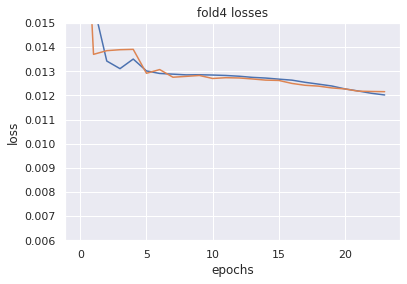

==SCORED_ONLY==
-----EPOCH1-----
train_loss: 0.65333, train_metric: 0.65326
valid_loss: 0.30608, valid_metric: 0.30555
-----EPOCH2-----
train_loss: 0.06698, train_metric: 0.06520
valid_loss: 0.02263, valid_metric: 0.02017
-----EPOCH3-----
train_loss: 0.02119, train_metric: 0.01848
valid_loss: 0.02036, valid_metric: 0.01748
-----EPOCH4-----
train_loss: 0.02004, train_metric: 0.01707
valid_loss: 0.02007, valid_metric: 0.01704
-----EPOCH5-----
train_loss: 0.02458, train_metric: 0.02144
valid_loss: 0.02016, valid_metric: 0.01694
-----EPOCH6-----
train_loss: 0.01982, train_metric: 0.01661
valid_loss: 0.02009, valid_metric: 0.01679
-----EPOCH7-----
train_loss: 0.01970, train_metric: 0.01647
valid_loss: 0.01997, valid_metric: 0.01668
-----EPOCH8-----
train_loss: 0.01955, train_metric: 0.01631
valid_loss: 0.01991, valid_metric: 0.01663
-----EPOCH9-----
train_loss: 0.01979, train_metric: 0.01655
valid_loss: 0.01996, valid_metric: 0.01665
-----EPOCH10-----
train_loss: 0.01958, train_metric: 0.01

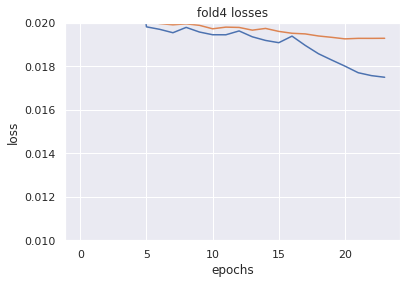

==========FOLD5==========
==ALL_TARGETS==
-----EPOCH1-----
train_loss: 0.50839, train_metric: 0.50796
valid_loss: 0.02233, valid_metric: 0.02013
-----EPOCH2-----
train_loss: 0.01608, train_metric: 0.01323
valid_loss: 0.01401, valid_metric: 0.01101
-----EPOCH3-----
train_loss: 0.01350, train_metric: 0.01026
valid_loss: 0.01298, valid_metric: 0.00969
-----EPOCH4-----
train_loss: 0.01305, train_metric: 0.00972
valid_loss: 0.01285, valid_metric: 0.00958
-----EPOCH5-----
train_loss: 0.01289, train_metric: 0.00958
valid_loss: 0.01464, valid_metric: 0.01090
-----EPOCH6-----
train_loss: 0.01303, train_metric: 0.00973
valid_loss: 0.01290, valid_metric: 0.00965
-----EPOCH7-----
train_loss: 0.01293, train_metric: 0.00966
valid_loss: 0.01303, valid_metric: 0.00972
-----EPOCH8-----
train_loss: 0.01288, train_metric: 0.00962
valid_loss: 0.01262, valid_metric: 0.00937
-----EPOCH9-----
train_loss: 0.01287, train_metric: 0.00961
valid_loss: 0.01279, valid_metric: 0.00956
-----EPOCH10-----
train_loss: 0

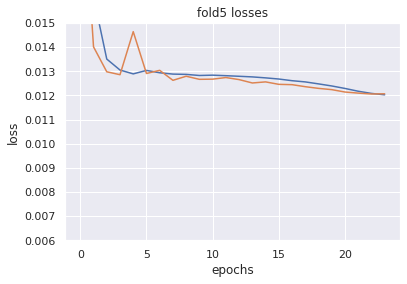

==SCORED_ONLY==
-----EPOCH1-----
train_loss: 0.65268, train_metric: 0.65260
valid_loss: 0.30715, valid_metric: 0.30663
-----EPOCH2-----
train_loss: 0.06686, train_metric: 0.06507
valid_loss: 0.02253, valid_metric: 0.02006
-----EPOCH3-----
train_loss: 0.02118, train_metric: 0.01846
valid_loss: 0.02035, valid_metric: 0.01748
-----EPOCH4-----
train_loss: 0.02008, train_metric: 0.01710
valid_loss: 0.02001, valid_metric: 0.01698
-----EPOCH5-----
train_loss: 0.02270, train_metric: 0.01953
valid_loss: 0.02015, valid_metric: 0.01684
-----EPOCH6-----
train_loss: 0.01982, train_metric: 0.01660
valid_loss: 0.02011, valid_metric: 0.01668
-----EPOCH7-----
train_loss: 0.01974, train_metric: 0.01651
valid_loss: 0.01991, valid_metric: 0.01657
-----EPOCH8-----
train_loss: 0.01960, train_metric: 0.01636
valid_loss: 0.01984, valid_metric: 0.01655
-----EPOCH9-----
train_loss: 0.01978, train_metric: 0.01655
valid_loss: 0.01997, valid_metric: 0.01671
-----EPOCH10-----
train_loss: 0.01960, train_metric: 0.01

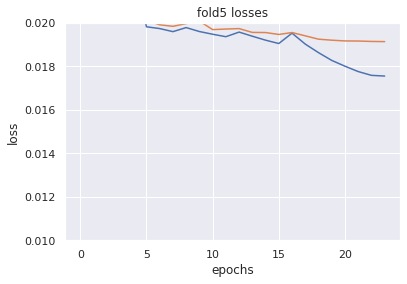

 
SEED : 1

==========FOLD1==========
==ALL_TARGETS==
-----EPOCH1-----
train_loss: 0.50774, train_metric: 0.50731
valid_loss: 0.07069, valid_metric: 0.06875
-----EPOCH2-----
train_loss: 0.01609, train_metric: 0.01324
valid_loss: 0.01355, valid_metric: 0.01046
-----EPOCH3-----
train_loss: 0.01345, train_metric: 0.01022
valid_loss: 0.01289, valid_metric: 0.00962
-----EPOCH4-----
train_loss: 0.01307, train_metric: 0.00976
valid_loss: 0.01274, valid_metric: 0.00946
-----EPOCH5-----
train_loss: 0.01296, train_metric: 0.00965
valid_loss: 0.01300, valid_metric: 0.00960
-----EPOCH6-----
train_loss: 0.01289, train_metric: 0.00958
valid_loss: 0.01273, valid_metric: 0.00943
-----EPOCH7-----
train_loss: 0.01288, train_metric: 0.00961
valid_loss: 0.01434, valid_metric: 0.01107
-----EPOCH8-----
train_loss: 0.01288, train_metric: 0.00963
valid_loss: 0.01286, valid_metric: 0.00964
-----EPOCH9-----
train_loss: 0.01282, train_metric: 0.00957
valid_loss: 0.01281, valid_metric: 0.00957
-----EPOCH10-----
t

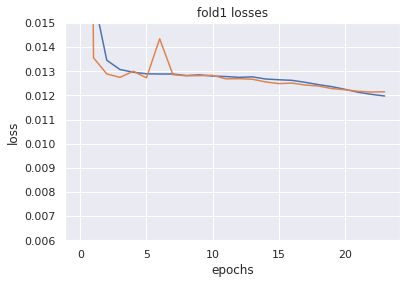

==SCORED_ONLY==
-----EPOCH1-----
train_loss: 0.65064, train_metric: 0.65057
valid_loss: 0.30444, valid_metric: 0.30391
-----EPOCH2-----
train_loss: 0.06743, train_metric: 0.06565
valid_loss: 0.02266, valid_metric: 0.02021
-----EPOCH3-----
train_loss: 0.02118, train_metric: 0.01847
valid_loss: 0.02031, valid_metric: 0.01744
-----EPOCH4-----
train_loss: 0.02010, train_metric: 0.01712
valid_loss: 0.01991, valid_metric: 0.01689
-----EPOCH5-----
train_loss: 0.02205, train_metric: 0.01891
valid_loss: 0.01999, valid_metric: 0.01669
-----EPOCH6-----
train_loss: 0.01981, train_metric: 0.01661
valid_loss: 0.01996, valid_metric: 0.01666
-----EPOCH7-----
train_loss: 0.01968, train_metric: 0.01646
valid_loss: 0.01975, valid_metric: 0.01646
-----EPOCH8-----
train_loss: 0.01958, train_metric: 0.01634
valid_loss: 0.01969, valid_metric: 0.01642
-----EPOCH9-----
train_loss: 0.01995, train_metric: 0.01672
valid_loss: 0.02000, valid_metric: 0.01666
-----EPOCH10-----
train_loss: 0.01968, train_metric: 0.01

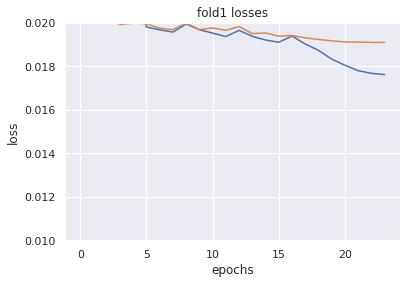

==========FOLD2==========
==ALL_TARGETS==
-----EPOCH1-----
train_loss: 0.50987, train_metric: 0.50944
valid_loss: 0.02324, valid_metric: 0.02105
-----EPOCH2-----
train_loss: 0.01609, train_metric: 0.01324
valid_loss: 0.01397, valid_metric: 0.01077
-----EPOCH3-----
train_loss: 0.01338, train_metric: 0.01014
valid_loss: 0.01306, valid_metric: 0.00980
-----EPOCH4-----
train_loss: 0.01301, train_metric: 0.00973
valid_loss: 0.01418, valid_metric: 0.01086
-----EPOCH5-----
train_loss: 0.01296, train_metric: 0.00965
valid_loss: 0.01320, valid_metric: 0.00982
-----EPOCH6-----
train_loss: 0.01294, train_metric: 0.00963
valid_loss: 0.01333, valid_metric: 0.01003
-----EPOCH7-----
train_loss: 0.01284, train_metric: 0.00956
valid_loss: 0.01363, valid_metric: 0.01038
-----EPOCH8-----
train_loss: 0.01285, train_metric: 0.00959
valid_loss: 0.01282, valid_metric: 0.00959
-----EPOCH9-----
train_loss: 0.01279, train_metric: 0.00955
valid_loss: 0.01286, valid_metric: 0.00965
-----EPOCH10-----
train_loss: 0

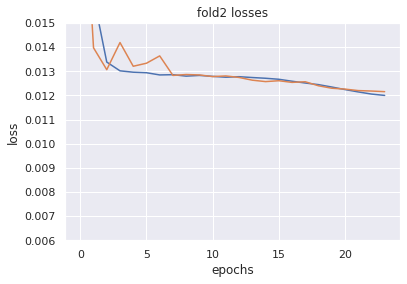

==SCORED_ONLY==
-----EPOCH1-----
train_loss: 0.65313, train_metric: 0.65306
valid_loss: 0.30455, valid_metric: 0.30403
-----EPOCH2-----
train_loss: 0.06721, train_metric: 0.06544
valid_loss: 0.02262, valid_metric: 0.02017
-----EPOCH3-----
train_loss: 0.02119, train_metric: 0.01849
valid_loss: 0.02029, valid_metric: 0.01741
-----EPOCH4-----
train_loss: 0.02009, train_metric: 0.01712
valid_loss: 0.02002, valid_metric: 0.01699
-----EPOCH5-----
train_loss: 0.02580, train_metric: 0.02267
valid_loss: 0.02011, valid_metric: 0.01689
-----EPOCH6-----
train_loss: 0.01981, train_metric: 0.01661
valid_loss: 0.01991, valid_metric: 0.01661
-----EPOCH7-----
train_loss: 0.01962, train_metric: 0.01640
valid_loss: 0.01981, valid_metric: 0.01655
-----EPOCH8-----
train_loss: 0.01953, train_metric: 0.01630
valid_loss: 0.01979, valid_metric: 0.01652
-----EPOCH9-----
train_loss: 0.01977, train_metric: 0.01653
valid_loss: 0.01988, valid_metric: 0.01659
-----EPOCH10-----
train_loss: 0.01951, train_metric: 0.01

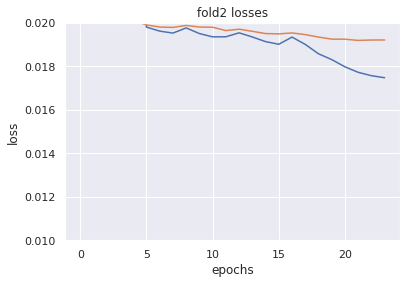

==========FOLD3==========
==ALL_TARGETS==
-----EPOCH1-----
train_loss: 0.50885, train_metric: 0.50842
valid_loss: 0.02541, valid_metric: 0.02303
-----EPOCH2-----
train_loss: 0.01600, train_metric: 0.01316
valid_loss: 0.01420, valid_metric: 0.01100
-----EPOCH3-----
train_loss: 0.01359, train_metric: 0.01033
valid_loss: 0.01390, valid_metric: 0.01065
-----EPOCH4-----
train_loss: 0.01314, train_metric: 0.00985
valid_loss: 0.01271, valid_metric: 0.00942
-----EPOCH5-----
train_loss: 0.01295, train_metric: 0.00966
valid_loss: 0.01565, valid_metric: 0.01240
-----EPOCH6-----
train_loss: 0.01292, train_metric: 0.00965
valid_loss: 0.01269, valid_metric: 0.00940
-----EPOCH7-----
train_loss: 0.01290, train_metric: 0.00964
valid_loss: 0.01268, valid_metric: 0.00939
-----EPOCH8-----
train_loss: 0.01288, train_metric: 0.00963
valid_loss: 0.01273, valid_metric: 0.00946
-----EPOCH9-----
train_loss: 0.01288, train_metric: 0.00964
valid_loss: 0.01263, valid_metric: 0.00934
-----EPOCH10-----
train_loss: 0

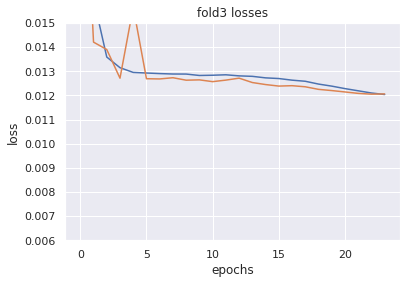

==SCORED_ONLY==
-----EPOCH1-----
train_loss: 0.65072, train_metric: 0.65064
valid_loss: 0.30295, valid_metric: 0.30242
-----EPOCH2-----
train_loss: 0.06670, train_metric: 0.06492
valid_loss: 0.02283, valid_metric: 0.02038
-----EPOCH3-----
train_loss: 0.02119, train_metric: 0.01848
valid_loss: 0.02042, valid_metric: 0.01755
-----EPOCH4-----
train_loss: 0.02014, train_metric: 0.01717
valid_loss: 0.02007, valid_metric: 0.01704
-----EPOCH5-----
train_loss: 0.02177, train_metric: 0.01863
valid_loss: 0.02020, valid_metric: 0.01692
-----EPOCH6-----
train_loss: 0.01987, train_metric: 0.01667
valid_loss: 0.01999, valid_metric: 0.01674
-----EPOCH7-----
train_loss: 0.01972, train_metric: 0.01650
valid_loss: 0.02005, valid_metric: 0.01675
-----EPOCH8-----
train_loss: 0.01961, train_metric: 0.01638
valid_loss: 0.01996, valid_metric: 0.01664
-----EPOCH9-----
train_loss: 0.01989, train_metric: 0.01666
valid_loss: 0.02002, valid_metric: 0.01683
-----EPOCH10-----
train_loss: 0.01964, train_metric: 0.01

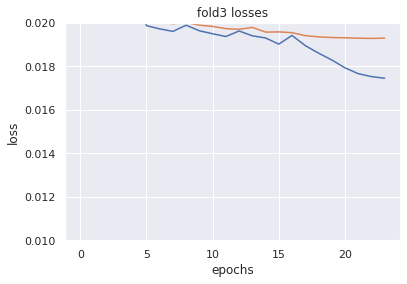

==========FOLD4==========
==ALL_TARGETS==
-----EPOCH1-----
train_loss: 0.50818, train_metric: 0.50774
valid_loss: 0.02351, valid_metric: 0.02132
-----EPOCH2-----
train_loss: 0.01631, train_metric: 0.01346
valid_loss: 0.01421, valid_metric: 0.01099
-----EPOCH3-----
train_loss: 0.01336, train_metric: 0.01007
valid_loss: 0.01285, valid_metric: 0.00962
-----EPOCH4-----
train_loss: 0.01303, train_metric: 0.00973
valid_loss: 0.01472, valid_metric: 0.01145
-----EPOCH5-----
train_loss: 0.01307, train_metric: 0.00976
valid_loss: 0.01473, valid_metric: 0.01135
-----EPOCH6-----
train_loss: 0.01297, train_metric: 0.00965
valid_loss: 0.01274, valid_metric: 0.00947
-----EPOCH7-----
train_loss: 0.01282, train_metric: 0.00954
valid_loss: 0.01285, valid_metric: 0.00959
-----EPOCH8-----
train_loss: 0.01288, train_metric: 0.00963
valid_loss: 0.01292, valid_metric: 0.00964
-----EPOCH9-----
train_loss: 0.01284, train_metric: 0.00959
valid_loss: 0.01278, valid_metric: 0.00957
-----EPOCH10-----
train_loss: 0

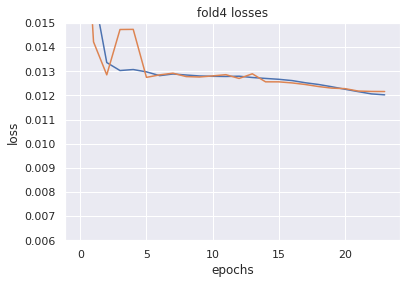

==SCORED_ONLY==
-----EPOCH1-----
train_loss: 0.65250, train_metric: 0.65243
valid_loss: 0.30856, valid_metric: 0.30804
-----EPOCH2-----
train_loss: 0.06764, train_metric: 0.06586
valid_loss: 0.02265, valid_metric: 0.02019
-----EPOCH3-----
train_loss: 0.02127, train_metric: 0.01856
valid_loss: 0.02045, valid_metric: 0.01758
-----EPOCH4-----
train_loss: 0.02008, train_metric: 0.01710
valid_loss: 0.02017, valid_metric: 0.01715
-----EPOCH5-----
train_loss: 0.02325, train_metric: 0.02010
valid_loss: 0.02023, valid_metric: 0.01701
-----EPOCH6-----
train_loss: 0.01988, train_metric: 0.01668
valid_loss: 0.02003, valid_metric: 0.01678
-----EPOCH7-----
train_loss: 0.01972, train_metric: 0.01650
valid_loss: 0.01997, valid_metric: 0.01664
-----EPOCH8-----
train_loss: 0.01955, train_metric: 0.01632
valid_loss: 0.01999, valid_metric: 0.01673
-----EPOCH9-----
train_loss: 0.01994, train_metric: 0.01671
valid_loss: 0.02009, valid_metric: 0.01680
-----EPOCH10-----
train_loss: 0.01957, train_metric: 0.01

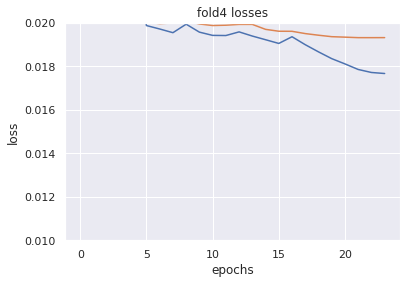

==========FOLD5==========
==ALL_TARGETS==
-----EPOCH1-----
train_loss: 0.50851, train_metric: 0.50808
valid_loss: 0.08883, valid_metric: 0.08687
-----EPOCH2-----
train_loss: 0.01603, train_metric: 0.01318
valid_loss: 0.01415, valid_metric: 0.01104
-----EPOCH3-----
train_loss: 0.01349, train_metric: 0.01026
valid_loss: 0.01412, valid_metric: 0.01089
-----EPOCH4-----
train_loss: 0.01323, train_metric: 0.00991
valid_loss: 0.01345, valid_metric: 0.01014
-----EPOCH5-----
train_loss: 0.01295, train_metric: 0.00963
valid_loss: 0.01365, valid_metric: 0.01035
-----EPOCH6-----
train_loss: 0.01400, train_metric: 0.01059
valid_loss: 0.01316, valid_metric: 0.00968
-----EPOCH7-----
train_loss: 0.01310, train_metric: 0.00976
valid_loss: 0.01283, valid_metric: 0.00953
-----EPOCH8-----
train_loss: 0.01297, train_metric: 0.00971
valid_loss: 0.01279, valid_metric: 0.00955
-----EPOCH9-----
train_loss: 0.01293, train_metric: 0.00969
valid_loss: 0.01284, valid_metric: 0.00960
-----EPOCH10-----
train_loss: 0

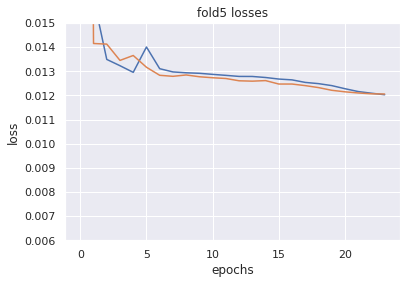

==SCORED_ONLY==
-----EPOCH1-----
train_loss: 0.65510, train_metric: 0.65503
valid_loss: 0.31375, valid_metric: 0.31324
-----EPOCH2-----
train_loss: 0.06787, train_metric: 0.06609
valid_loss: 0.02282, valid_metric: 0.02037
-----EPOCH3-----
train_loss: 0.02112, train_metric: 0.01840
valid_loss: 0.02032, valid_metric: 0.01744
-----EPOCH4-----
train_loss: 0.01997, train_metric: 0.01698
valid_loss: 0.02012, valid_metric: 0.01708
-----EPOCH5-----
train_loss: 0.02379, train_metric: 0.02060
valid_loss: 0.02021, valid_metric: 0.01682
-----EPOCH6-----
train_loss: 0.01980, train_metric: 0.01655
valid_loss: 0.02006, valid_metric: 0.01675
-----EPOCH7-----
train_loss: 0.01957, train_metric: 0.01632
valid_loss: 0.01993, valid_metric: 0.01661
-----EPOCH8-----
train_loss: 0.01944, train_metric: 0.01619
valid_loss: 0.01996, valid_metric: 0.01661
-----EPOCH9-----
train_loss: 0.01972, train_metric: 0.01647
valid_loss: 0.01989, valid_metric: 0.01657
-----EPOCH10-----
train_loss: 0.01950, train_metric: 0.01

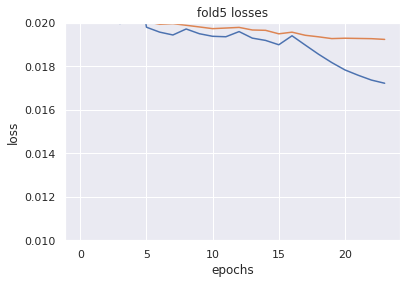

In [62]:
# Averaging on multiple SEEDS

SEED = [0, 1]
oof = np.zeros((len(train), len(target_cols)))
predictions = np.zeros((len(test), len(target_cols)))

print(f'device used: {DEVICE}')

for seed in SEED:
    
    print(f' ')
    print(f'SEED : {seed}')
    print(f'')
    
    oof_, predictions_ = run_k_fold(NFOLDS, seed, EPOCHS, LEARNING_RATE)
    oof += oof_ / len(SEED)
    predictions += predictions_ / len(SEED)
    
train[target_cols] = oof
test[target_cols] = predictions

In [63]:
valid_results = train_targets_scored.drop(columns=target_cols).merge(
    train[['sig_id']+target_cols], on='sig_id', how='left').fillna(0)

y_true = train_targets_scored[target_cols].values
y_pred = valid_results[target_cols].values

cv = 0
for i in range(len(target_cols)):
    cv_ = log_loss(y_true[:, i], y_pred[:, i])
    cv += cv_ / len(target_cols)
    
auc = 0
for i in range(len(target_cols)):
    auc_ = roc_auc_score(y_true[:, i], y_pred[:, i])
    auc += auc_ / len(target_cols)
    
print(f'CV log_loss: {cv:.6f}')
print(f'AUC: {auc:.6f}')

CV log_loss: 0.014786
AUC: 0.804712


In [64]:
file_path = 'oof_Simple_Deep.npy'
np.save(file_path, y_pred)

submission_Simple_Deep2 = sample_submission.drop(columns=target_cols).merge(
    test[['sig_id']+target_cols], on='sig_id', how='left').fillna(0).iloc[:, 1:]
# sub.to_csv('submission.csv', index=False)

In [65]:
submission_Simple_Deep = submission_Simple_Deep1 * 0.8 + submission_Simple_Deep2 * 0.2

In [66]:
submission.iloc[:, 1:] = submission_Simple * 0.25 + submission_ResNet * 0.25 + submission_Simple_Deep * 0.25 + submission_TabNet * 0.25

submission.to_csv('submission.csv', index=False)